# Problem Statement 

### What research topic did you select?
 
Our group has decided to aggregate and consequently, analyze movie-related data in order to better understand the relationship between the different components in movie conception, production and distribution, and its subsequent commercial and critical success.

### Why is this topic interesting to you?

Our group members all love watching movies and we find it interesting and useful to find a form of correlation between movie statistics and their level of success.

Perhaps we can even predict the next blockbuster before it hits the big screen!

# Dataset Selected

### What dataset did you pick for analysis? 

1. Kaggle dataset from https://www.kaggle.com/rounakbanik/the-movies-dataset which uses the grouplens dataset and adds in other fields, such as poster information.

2. Open source dataset from https://grouplens.org/datasets/movielens/ which contains 20 million entries containing ratings, titles and genres. 

3. Kaggle dataset from https://www.kaggle.com/theacademy/academy-awards which contains all the movies / cast who were nominated for an academy award and indicates if they won it

4. Kaggle dataset from https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset which contains budget, duration, cast etc.


### What was the structure of the dataset (CSV file, API calls, web-scraped etc.)?

Most of the data are available publicly via CSV files. Any additional information required can be web-scraped from websites such as https://www.rottentomatoes.com/.

### Importing relevant libraries

In [191]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

### Read in data

In [192]:
# Dataset from imdb-45k dataset (dataset 1) mentioned above
df_imdb = pd.read_csv('data/imdb_45k/movies_metadata.csv')


# Dataset from movielens dataset (dataset 2) mentioned above
df_movielens_movies = pd.read_csv('data/movielens/movies.csv')

df_movielens_ratings = pd.read_csv('data/movielens/ratings.csv')

df_credits = pd.read_csv('data/imdb_45k/credits.csv')


# Dataset from awards dataset (dataset 3) mentioned above
df_awards = pd.read_csv('data/awards.csv')


C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Combining and Cleaning Datasets 


To perform analysis effectively, we would have to clean the data by removing null values etc. or removing movies that have very few reviews as those would not provide meaningful analysis.

As the data in each dataset do not cover exactly the same movies, we would have to combine them to utilise them effectively. 

### Cleaning Imdb-45k Dataset

In [193]:
df_imdb = pd.read_csv('data/imdb_45k/movies_metadata.csv')

display(df_imdb.head())
display(df_imdb.info())

# Dropping all unnecessary columns before removing all null values
df_imdb = df_imdb.drop(['belongs_to_collection', 'homepage', 'video', 'poster_path', 'adult', 'tagline', 'original_title'], axis = 1)
df_imdb = df_imdb.dropna(how = 'any', axis = 0)

# Typecasting id and budget to int
df_imdb['id'] = df_imdb['id'].astype(int)
df_imdb['budget'] = df_imdb['budget'].astype(int)
df_imdb['vote_count'] = df_imdb['vote_count'].astype(int)

# Removing all movies with budgets < 1000 and revenue < 1000
df_imdb = df_imdb[(df_imdb['revenue'] >= 1000) & (df_imdb['budget'] >= 1000) & (df_imdb['vote_count'] > 5)]

# Remove all duplicates. We only found that there were duplicates later on which causes alot of trouble
df_imdb = df_imdb.drop_duplicates(subset = 'id', keep = 'first')


df_imdb.info()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,5415.00
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,2413.00
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.00,127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.00,106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5186 entries, 0 to 45409
Data columns (total 17 columns):
budget                  5186 non-null int32
genres                  5186 non-null object
id                      5186 non-null int32
imdb_id                 5186 non-null object
original_language       5186 non-null object
overview                5186 non-null object
popularity              5186 non-null object
production_companies    5186 non-null object
production_countries    5186 non-null object
release_date            5186 non-null object
revenue                 5186 non-null float64
runtime                 5186 non-null float64
spoken_languages        5186 non-null object
status                  5186 non-null object
title                   5186 non-null object
vote_average            5186 non-null float64
vote_count              5186 non-null int32
dtypes: float64(3), int32(3), object(11)
memory usage: 668.5+ KB


In [194]:
# Since multiple movies can have the same name across different years, we add the year to the title 
# This also makes the format of the title to be the same as the one in the movielens dataset

releasedate_formatted = []

for date in df_imdb['release_date']:
    formatted = re.sub('-..-..', '', date)
    formatted = ' ({})'.format(formatted)
    releasedate_formatted.append((formatted))

df_imdb['release_year'] = releasedate_formatted

df_imdb['title'] = df_imdb['title'] + df_imdb['release_year']
display(df_imdb.head())

,budget,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,release_year
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.95,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story (1995),7.70,5415,(1995)
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.02,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji (1995),6.90,2413,(1995)
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.86,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00,127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale (1995),6.10,34,(1995)
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.92,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.00,170.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat (1995),7.70,1886,(1995)
8,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,en,International action superstar Jean Claude Van...,5.23,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.00,106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sudden Death (1995),5.50,174,(1995)


### Cleaning Movielens Dataset


In [195]:
# Groupby and aggregation to filter the movies that have <= 5 reviews and get the average rating of each movie
display(df_movielens_ratings.head())
display(df_movielens_ratings.info())

df_movielens_ratings_bymovie = df_movielens_ratings.groupby('movieId')
df_int1 = []
df_int1 = df_movielens_ratings_bymovie['rating'].count().reset_index(name = 'n')
df_int1 = df_int1[df_int1['n']<=5]
df_int1
ml_ratings_1 = df_movielens_ratings[
    ~df_movielens_ratings['movieId'].isin(df_int1['movieId'])
]
df_int = []
df_int2 = ml_ratings_1.groupby('movieId')
df_movielens_ratings_bymovie = df_int2['rating'].mean().reset_index(name = 'average_rating')
display(df_movielens_ratings_bymovie.head())
display(df_movielens_ratings_bymovie.info())

,userId,movieId,rating,timestamp
0,1,2,3.50,1112486027
1,1,29,3.50,1112484676
2,1,32,3.50,1112484819
3,1,47,3.50,1112484727
4,1,50,3.50,1112484580


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


None

,movieId,average_rating
0,1,3.92
1,2,3.21
2,3,3.15
3,4,2.86
4,5,3.06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17519 entries, 0 to 17518
Data columns (total 2 columns):
movieId           17519 non-null int64
average_rating    17519 non-null float64
dtypes: float64(1), int64(1)
memory usage: 273.8 KB


None

In [196]:
display(df_movielens_movies.head())
display(df_movielens_movies.info())

# Removing all duplicates, as we only found out that there were duplicates later on which caused alot of trouble
df_movielens_movies = df_movielens_movies.drop_duplicates(subset = 'title', keep = 'first')

# Only select movies that have >5 reviews
df_movielens_movies_more5reviews = df_movielens_movies[df_movielens_movies['movieId'].isin(df_movielens_ratings_bymovie['movieId'])]
df_movielens_movies_more5reviews.info()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17512 entries, 0 to 27124
Data columns (total 3 columns):
movieId    17512 non-null int64
title      17512 non-null object
genres     17512 non-null object
dtypes: int64(1), object(2)
memory usage: 547.2+ KB


In [197]:
# Join the 2 dataframes together on movieId
df_movielens_movies_more5reviews = df_movielens_movies_more5reviews.set_index('movieId').join(df_movielens_ratings_bymovie.set_index('movieId'), how = 'inner')

df_movielens_movies_more5reviews.info()

# Number of entries are the same, hence no info was lost on join

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17512 entries, 1 to 130496
Data columns (total 3 columns):
title             17512 non-null object
genres            17512 non-null object
average_rating    17512 non-null float64
dtypes: float64(1), object(2)
memory usage: 547.2+ KB


In [198]:
df_imdb.head()

,budget,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,release_year
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.95,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story (1995),7.70,5415,(1995)
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.02,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji (1995),6.90,2413,(1995)
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.86,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00,127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale (1995),6.10,34,(1995)
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.92,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.00,170.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat (1995),7.70,1886,(1995)
8,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,en,International action superstar Jean Claude Van...,5.23,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.00,106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sudden Death (1995),5.50,174,(1995)


### Merging the IMDB-45k and Movielens Dataset to get complete list of movies to be analysed

In [199]:
# Joining IMDB-45k and Movielens dataset 
df_merged = df_imdb.set_index('title').join(df_movielens_movies_more5reviews.set_index('title'), how = 'inner', on = ['title'], rsuffix = '_movielens')
df_merged = df_merged.rename(index=str, columns={'vote_count' : 'vote_count_imdb', 'vote_average' : 'average_rating_imdb', 'average_rating' : 'average_rating_movielens'})
df_merged = df_merged.reset_index()
display(df_merged.head())
display(df_merged.info())

,title,budget,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,average_rating_imdb,vote_count_imdb,release_year,genres_movielens,average_rating_movielens
0,Toy Story (1995),30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.95,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,7.70,5415,(1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,Jumanji (1995),65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.02,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,6.90,2413,(1995),Adventure|Children|Fantasy,3.21
2,Waiting to Exhale (1995),16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.86,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00,127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,6.10,34,(1995),Comedy|Drama|Romance,2.86
3,Heat (1995),60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.92,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.00,170.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,7.70,1886,(1995),Action|Crime|Thriller,3.83
4,Sudden Death (1995),35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,en,International action superstar Jean Claude Van...,5.23,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.00,106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,5.50,174,(1995),Action,3.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Data columns (total 20 columns):
title                       3083 non-null object
budget                      3083 non-null int32
genres                      3083 non-null object
id                          3083 non-null int32
imdb_id                     3083 non-null object
original_language           3083 non-null object
overview                    3083 non-null object
popularity                  3083 non-null object
production_companies        3083 non-null object
production_countries        3083 non-null object
release_date                3083 non-null object
revenue                     3083 non-null float64
runtime                     3083 non-null float64
spoken_languages            3083 non-null object
status                      3083 non-null object
average_rating_imdb         3083 non-null float64
vote_count_imdb             3083 non-null int32
release_year                3083 non-null object
genres_movi

None

### Merging Genres

There are 2 different lists of genres, 1 from movielens dataset and 1 from imdb-45k dataset. To get the most complete list, we merge the 2 lists of genres.

In [200]:
genre_imdb = df_merged['genres']
genre_imdb_formatted = []
genre_movielens = df_merged['genres_movielens']
genre_movielens_formatted = []
genre_merged = []

# Genres column from imdb is a string that is poorly formatted. This will format the string into a list of strings.
for genre in genre_imdb:
    genre = re.sub("\{'id': [0-9]*,", '', genre)
    genre = re.sub("'name': ", '', genre)
    genre = re.sub('[\[\]\'}]', '', genre)
    genre = genre.replace(' ', '')
    genre = genre.split(',')
    genre_imdb_formatted.append(genre)

# Genres column from Movielens is separated by | and we convert it into a list of strings.
for genre in genre_movielens:
    genre = genre.split('|')
    genre_movielens_formatted.append(genre)
    
# Iterate through both lists and find all the unique values to provide the most comprehensive list of genres for each movie
for genre_imdb, genre_movielens in zip(genre_imdb_formatted, genre_movielens_formatted):
    merged = list(set(genre_imdb + genre_movielens))
    genre_merged.append(merged)

# Replace the genres column in df_merged with the more comprehensive data
df_merged['genres'] = genre_merged
df_merged = df_merged.drop('genres_movielens', axis = 1)

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Data columns (total 19 columns):
title                       3083 non-null object
budget                      3083 non-null int32
genres                      3083 non-null object
id                          3083 non-null int32
imdb_id                     3083 non-null object
original_language           3083 non-null object
overview                    3083 non-null object
popularity                  3083 non-null object
production_companies        3083 non-null object
production_countries        3083 non-null object
release_date                3083 non-null object
revenue                     3083 non-null float64
runtime                     3083 non-null float64
spoken_languages            3083 non-null object
status                      3083 non-null object
average_rating_imdb         3083 non-null float64
vote_count_imdb             3083 non-null int32
release_year                3083 non-null object
average_rat

### Adding in Plot Keywords by WebScraping

We realised some other datasets use plot keywords from Imdb as a variable as well. We thought that it would be interesting to see if theres any correlation using the plot keywords.

As those datasets are very limited and we didn't want to compromise the size of our already small data, we decided to scrape Imdb ourselves to get the plot keywords. We used BeautifulSoup as our main webscraping library.

The scraping code is commented out to allow the whole notebook to be run again without scraping.

In [201]:
# Import relevant webscraping libraries
from requests import get
from bs4 import BeautifulSoup

In [202]:
def ScrapePlotKeywords(movieId):
    output = []
    url = 'https://www.imdb.com/title/' + movieId + '/'
    response = get(url)
    html_soup = BeautifulSoup(response.text, 'html.parser')
    plotKeywords = html_soup.find_all('span', class_ = 'itemprop')
    for keyword in plotKeywords:
#         print(keyword.contents)
        output.append(str(keyword.contents[0]))
    return output

In [203]:
# imdb_ids = df_merged['imdb_id']
# plotKeywords = []
# counter = 0 #counter to keep track of progress
# for id in imdb_ids:
#     print("{} out of {} completed".format(counter, len(imdb_ids)))
#     plotKeywords.append(ScrapePlotKeywords(id))
#     counter += 1

In [204]:
# df_merged['plot_keywords'] = plotKeywords
# df_merged = df_merged.drop('index', axis = 1)

In [205]:
# Export csv to prevent having to WebScrape again
# df_merged.to_csv('merged_dataframe_withPlot.csv', index=False)

In [206]:
#Read in Data again to allow us to not do the top steps again (Takes awhile)
df_merged_plot = pd.read_csv('data/df_merged_with_awards.csv')

### Roadblocks

During our cleaning of data, after webscraping, we realised that some data was duplicated, which would mess up the index. After fixing the issue, we did not want to waste time scraping. Hence, we joined back the merged_dataframe_withPlot.csv with the newly updated df_merged

In [207]:
# Only keeping necessary columns for cleaner joining
df_merged_plot = df_merged_plot[['id', 'plot_keywords']]
df_merged = df_merged.set_index('id').join(df_merged_plot.set_index('id')).reset_index()
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 20 columns):
id                          3085 non-null int64
title                       3085 non-null object
budget                      3085 non-null int32
genres                      3085 non-null object
imdb_id                     3085 non-null object
original_language           3085 non-null object
overview                    3085 non-null object
popularity                  3085 non-null object
production_companies        3085 non-null object
production_countries        3085 non-null object
release_date                3085 non-null object
revenue                     3085 non-null float64
runtime                     3085 non-null float64
spoken_languages            3085 non-null object
status                      3085 non-null object
average_rating_imdb         3085 non-null float64
vote_count_imdb             3085 non-null int32
release_year                3085 non-null object
average_rat

In [208]:
# Remove duplicates (Unsure why duplicates will appear due to the join)
df_merged = df_merged.drop_duplicates(subset = 'id', keep = 'first')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3083 entries, 0 to 3084
Data columns (total 20 columns):
id                          3083 non-null int64
title                       3083 non-null object
budget                      3083 non-null int32
genres                      3083 non-null object
imdb_id                     3083 non-null object
original_language           3083 non-null object
overview                    3083 non-null object
popularity                  3083 non-null object
production_companies        3083 non-null object
production_countries        3083 non-null object
release_date                3083 non-null object
revenue                     3083 non-null float64
runtime                     3083 non-null float64
spoken_languages            3083 non-null object
status                      3083 non-null object
average_rating_imdb         3083 non-null float64
vote_count_imdb             3083 non-null int32
release_year                3083 non-null object
average_rat

In [209]:
# Replace all the null values in plot_keywords
df_merged = df_merged.fillna(value = {'plot_keywords' : 'empty'})


plot_keywords_list = list(df_merged['plot_keywords'])
imdbId_list = list(df_merged['imdb_id'])
scraped_plot_list = list(df_merged['plot_keywords'])

In [210]:
# Only scrape those imdb_ids where there is no plot_keywords
for i in range(len(plot_keywords_list)):
    if (plot_keywords_list[i] == 'empty'):
        scraped_plot_list[i] = ScrapePlotKeywords(imdbId_list[i])
        print(i)
        
# Replace the plot_keywords column with the newly filled in column
df_merged['plot_keywords'] = scraped_plot_list

### Cleaning Awards Dataset

After getting the comprehensive list of movies that we can analyse, we will now add in the Awards data. But before we can do so, we have to clean the data as it is very messy. Another user of the same dataset faced the same problem and has kindly uploaded his kernel in which he cleaned the dataset. The kernel can be found here: https://www.kaggle.com/janandd/the-revised-oscars-database. His notebook was also on kaggle, which showed that the data was much more useful after cleaning. Hence, we decided to download his notebook and use it to clean the Awards Dataset to save time.


In [211]:
df_awards = pd.read_csv('data/awards_clean.csv')

In [212]:
display(df_awards.head())
display(df_awards.info())

df_awards = df_awards.dropna(subset = ['Film'])
df_awards = df_awards.drop('Unnamed: 0', axis = 1)

,Unnamed: 0,Year,Ceremony,Award,Winner,Name,Film
0,0,1928,1,Actor in a Leading Role,0,Richard Barthelmess,The Noose
1,1,1928,1,Actor in a Leading Role,1,Emil Jannings,The Last Command
2,2,1928,1,Actress in a Leading Role,0,Louise Dresser,A Ship Comes In
3,3,1928,1,Actress in a Leading Role,1,Janet Gaynor,7th Heaven
4,4,1928,1,Actress in a Leading Role,0,Gloria Swanson,Sadie Thompson


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 7 columns):
Unnamed: 0    9964 non-null int64
Year          9964 non-null int64
Ceremony      9964 non-null int64
Award         9964 non-null object
Winner        9964 non-null int64
Name          9964 non-null object
Film          9631 non-null object
dtypes: int64(4), object(3)
memory usage: 545.0+ KB


None

### Getting Awards for each film and its cast

Now that we have the cleaned Awards Dataset, we can calculate how many awards it won, to be measured as an dependent variable. Moreover, we can calculate how many awards its won before, which can be used as an independent variable. 

#### Calculate Awards for each Movie

In [213]:
display(df_awards.head())
display(df_awards.info())

# Drop all those entries who are not part of a film
df_awards = df_awards.dropna(subset = ['Film'])
# df_awards = df_awards.drop('Unnamed: 0', axis = 1)

# Format title to be same format as the merged dataset
df_awards['Film'] = df_awards['Film'] + ' (' + df_awards['Year'].astype(str) + ')'

# Select nominated films that are in df_merged and count how many awards each of those films won
df_film_award_inmerged = df_awards[df_awards['Film'].isin(df_merged['title'])]
df_film_award_count = df_film_award_inmerged.groupby('Film').size().reset_index(name = 'movie_award_count')

,Year,Ceremony,Award,Winner,Name,Film
0,1928,1,Actor in a Leading Role,0,Richard Barthelmess,The Noose
1,1928,1,Actor in a Leading Role,1,Emil Jannings,The Last Command
2,1928,1,Actress in a Leading Role,0,Louise Dresser,A Ship Comes In
3,1928,1,Actress in a Leading Role,1,Janet Gaynor,7th Heaven
4,1928,1,Actress in a Leading Role,0,Gloria Swanson,Sadie Thompson


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 0 to 9960
Data columns (total 6 columns):
Year        9631 non-null int64
Ceremony    9631 non-null int64
Award       9631 non-null object
Winner      9631 non-null int64
Name        9631 non-null object
Film        9631 non-null object
dtypes: int64(3), object(3)
memory usage: 526.7+ KB


None

In [214]:
# Join df_merged with the number of awards the movie won and filled the rest of the values to be 0

df_merged = df_merged.set_index('title').join(df_film_award_count.set_index('Film'))
df_merged = df_merged.reset_index().rename(index = str, columns ={'index' : 'title'})
df_merged = df_merged.fillna(value = {'movie_award_count' : 0})
df_merged['movie_award_count'] = df_merged['movie_award_count'].astype(int) 

#### Calculate Awards for cast members

First, we have to look at the cast members for each movie. Because the format of the cast and crew is a long string, we remove unnecessary info and format it into an array for easier parsing.

In [215]:
display(df_credits.head())
display(df_credits.info())
display(df_credits['cast'][0])

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
cast    45476 non-null object
crew    45476 non-null object
id      45476 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


None

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [216]:
# Takes in the series and returns a list of lists of cast names 
def format_cast(cast_series):

    cast_total = []
    
    # Only search for "'name':" and discard everything else
    name_search = re.compile(r"'name': [A-Z \'\"]+,?", re.I)

    for movie in cast_series:
        cast_list = movie.split('}')
        cast_per_movie = []
        for cast in cast_list:
            if (len(cast) <= 2): #to factor for the last entry in movie.split(), which will be ']'
                continue
            else:
                cast_name = re.search(name_search, cast)
                cast_name = re.sub("'name':", "", cast_name[0])
                cast_name = re.sub("[,\"]", '', cast_name)
                cast_name = cast_name.strip()
                cast_name = re.sub("^\'|\'$", "", cast_name)
                cast_per_movie.append(cast_name)            

        cast_total.append(cast_per_movie)
    return cast_total

In [217]:
# Only select movies in merged_df
df_credits_in_merged = df_credits[df_credits['id'].isin(df_merged['id'])]
df_credits_in_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3085 entries, 0 to 33838
Data columns (total 3 columns):
cast    3085 non-null object
crew    3085 non-null object
id      3085 non-null int64
dtypes: int64(1), object(2)
memory usage: 96.4+ KB


In [218]:
# Formatting the cast column
formatted_cast = format_cast(df_credits_in_merged['cast'])
print("length of formatted_cast: " + str(len(formatted_cast)))
df_credits_in_merged['formatted_cast'] = formatted_cast

length of formatted_cast: 3085


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [219]:
# Formatting the crew column
formatted_crew = format_cast(df_credits_in_merged['crew'])
print("length of formatted_crew: " + str(len(formatted_crew)))
df_credits_in_merged['formatted_crew'] = formatted_crew

length of formatted_crew: 3085


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [220]:
# Viewing the new df_credits_in_merged
df_credits_in_merged.head()

,cast,crew,id,formatted_cast,formatted_crew
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Larry J, Jonathan Hensleigh, James Horner, Jo..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"[Whitney Houston, Angela Bassett, Loretta Devi...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez..."
5,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",949,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[Michael Mann, Michael Mann, Art Linson, Micha..."
8,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...",9091,"[Jean, Powers Boothe, Dorian Harewood, Raymond...","[Peter Hyams, Karen Elise Baldwin, Gene Quinta..."


In [221]:
# Only select the awards possible for cast and count the number of nominations 
df_awards_cast_nominations = df_awards[(df_awards['Award'] == 'Actor in a Leading Role') | (df_awards['Award'] == 'Actress in a Leading Role') 
                           | (df_awards['Award'] == 'Actor in a Supporting Role') | (df_awards['Award'] == 'Actress in a Supporting Role')]

df_awards_cast_nominations = df_awards_cast_nominations[['Award','Name']]
df_awards_cast_nominations_groupby = df_awards_cast_nominations.groupby('Name').count()
nominations_count_list = df_awards_cast_nominations_groupby.to_dict()['Award']
nominations_count_list

{'Abigail Breslin': 1,
 'Adolph Caesar': 1,
 'Adolphe Menjou': 1,
 'Adriana Barraza': 1,
 'Adrien Brody': 1,
 'Agnes Moorehead': 4,
 'Akim Tamiroff': 2,
 'Al Pacino': 8,
 'Alan Alda': 1,
 'Alan Arkin': 4,
 'Alan Bates': 1,
 'Albert Basserman': 1,
 'Albert Brooks': 1,
 'Albert Finney': 5,
 'Alec Baldwin': 1,
 'Alec Guinness': 4,
 'Alexander Knox': 1,
 'Alfre Woodard': 1,
 'Alfred Lunt': 1,
 'Ali MacGraw': 1,
 'Alice Brady': 2,
 'Alicia Vikander': 1,
 'Aline MacMahon': 1,
 'Amy Adams': 5,
 'Amy Irving': 1,
 'Amy Madigan': 1,
 'Amy Ryan': 1,
 'Andrea Leeds': 1,
 'Andy Garcia': 1,
 'Angela Bassett': 1,
 'Angela Lansbury': 3,
 'Angelina Jolie': 2,
 'Anjelica Huston': 3,
 'Ann Blyth': 1,
 'Ann Harding': 1,
 'Ann Sothern': 1,
 'Ann-Margret': 2,
 'Anna Kendrick': 1,
 'Anna Magnani': 2,
 'Anna Paquin': 1,
 'Anne Archer': 1,
 'Anne Bancroft': 5,
 'Anne Baxter': 2,
 'Anne Hathaway': 2,
 'Anne Ramsey': 1,
 'Anne Revere': 3,
 'Anne Shirley': 1,
 'Annette Bening': 4,
 'Anouk Aimee': 1,
 'Anthony Fra

In [222]:
# Function to count the total number of awards won by the cast in each movie
def count_num_movies_cast_win(total_movie_cast_list, cast_appearances_list):
    output = []
    
    for movie in total_movie_cast_list:
        num_won = 0
        for cast in movie:
            if cast not in cast_appearances_list:
                continue
            else:
                num_won += cast_appearances_list[cast]
        output.append(num_won)
    return output

In [223]:
# Add to df_credits_in_merged
df_credits_in_merged['num_awards_nominations_cast'] = count_num_movies_cast_win(df_credits_in_merged['formatted_cast'], nominations_count_list)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Calculate Experience of each movie's cast and crew

We do this by calculating the number of movies each member of the crew and cast appeared in previously

In [224]:
# Function to count number of movies each actor appeared in, returns a dictionary of {'actor name' : 'number of past movies'}
def count_cast(total_cast_list):
    cast_list = {}
    for x in total_cast_list:
        for cast in x:
            if cast in cast_list:
                cast_list[cast] += 1
            else:
                cast_list[cast] = 1
                
    return cast_list

In [225]:
# Form a new df from the dictionary returned from count_cast
cast_appearances = count_cast(df_credits_in_merged['formatted_cast'])
df_cast_appearance = pd.DataFrame.from_dict(cast_appearances, orient='index')
df_cast_appearance = df_cast_appearance.rename(index=str, columns={"index": "cast_name", 0: "number_of_movies_appeared"})
df_cast_appearance.head()

,number_of_movies_appeared
Tom Hanks,26
Tim Allen,8
Don Rickles,6
Jim Varney,5
Wallace Shawn,13


In [226]:
# Repeat the above step to count crew numbers as well
crew_appearances = count_cast(df_credits_in_merged['formatted_crew'])
df_crew_appearance = pd.DataFrame.from_dict(crew_appearances, orient='index')
# df_crew_appearance = df_crew_appearance.reset_index()
df_crew_appearance = df_crew_appearance.rename(index=str, columns={"index": "crew_name", 0: "number_of_movies"})
df_crew_appearance.head()

,number_of_movies
John Lasseter,26
Joss Whedon,8
Andrew Stanton,19
Joel Cohen,2
Alec Sokolow,2


In [227]:
# Count the total number of movies that the cast of the movie appeared in before
def count_num_movies_cast_appear(total_movie_cast_list, cast_appearances_list):
    output = []
    
    for movie in total_movie_cast_list:
        total_num_of_movies = 0
        for cast in movie:
            total_num_of_movies += cast_appearances_list[cast]
        output.append(total_num_of_movies)
    return output

In [228]:
# Add the total number of movies of movies into df_credits_in_merged
df_credits_in_merged['num_prev_movies_of_crew'] = count_num_movies_cast_appear(df_credits_in_merged['formatted_crew'], crew_appearances)
df_credits_in_merged['num_prev_movies_of_cast'] = count_num_movies_cast_appear(df_credits_in_merged['formatted_cast'], cast_appearances)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [229]:
def count_num_awards_movie(movie_list):
    output = []
    
    for movie in movie_list:
        num_awards = 0
        for cast in movie:
            total_num_of_movies += cast_appearances_list[cast]
        output.append(total_num_of_movies)
    return output

In [230]:
df_credits_in_merged.head()

,cast,crew,id,formatted_cast,formatted_crew,num_awards_nominations_cast,num_prev_movies_of_crew,num_prev_movies_of_cast
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J...",5,893,160
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Larry J, Jonathan Hensleigh, James Horner, Jo...",5,191,134
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"[Whitney Houston, Angela Bassett, Loretta Devi...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez...",1,64,88
5,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",949,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[Michael Mann, Michael Mann, Art Linson, Micha...",21,599,452
8,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...",9091,"[Jean, Powers Boothe, Dorian Harewood, Raymond...","[Peter Hyams, Karen Elise Baldwin, Gene Quinta...",0,98,93


In [231]:
# Join back the df_credits_in_merged to df_merged
df_merged_with_awards = df_merged.set_index('id').join(df_credits_in_merged.set_index('id')).reset_index()

In [232]:
df_merged_with_awards.head()

,id,title,budget,genres,imdb_id,original_language,overview,popularity,production_companies,production_countries,...,average_rating_movielens,plot_keywords,movie_award_count,cast,crew,formatted_cast,formatted_crew,num_awards_nominations_cast,num_prev_movies_of_crew,num_prev_movies_of_cast
0,5,Four Rooms (1995),4000000,"[Comedy, Crime]",tt0113101,en,It's Ted the Bellhop's first night on the job....,9.03,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,3.37,"['woman', 'gagged woman', 'tied to a chair', '...",0,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...","[Tim Roth, Antonio Banderas, Jennifer Beals, M...","[Combustible Edison, Gary Frutkoff, Lance Brow...",5,716,176
1,12,Finding Nemo (2003),94000000,"[Comedy, Children, Adventure, Family, Animation]",tt0266543,en,"Nemo, an adventurous young clownfish, is unexp...",25.50,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,3.89,"['shark', 'great barrier reef', 'short term me...",0,"[{'cast_id': 8, 'character': 'Marlin (voice)',...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...","[Albert Brooks, Ellen DeGeneres, Alexander Gou...","[Andrew Stanton, Andrew Stanton, Andrew Stanto...",7,643,188
2,13,Forrest Gump (1994),55000000,"[Romance, Comedy, Drama, War]",tt0109830,en,A man with a low IQ has accomplished great thi...,48.31,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,4.03,"['vietnam war', 'amputee', 'war hero', 'vietna...",2,"[{'cast_id': 7, 'character': 'Forrest Gump', '...","[{'credit_id': '52fe420ec3a36847f800072d', 'de...","[Tom Hanks, Robin Wright, Gary Sinise, Mykelti...","[Robert Zemeckis, Wendy Finerman, Steve Tisch,...",10,1024,210
3,14,American Beauty (1999),15000000,"[Comedy, Drama]",tt0169547,en,"Lester Burnham, a depressed suburban father in...",20.73,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,4.16,"['midlife crisis', 'adulterous wife', 'unfaith...",2,"[{'cast_id': 6, 'character': 'Lester Burnham',...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...","[Kevin Spacey, Annette Bening, Thora Birch, We...","[Sam Mendes, Alan Ball, Bruce Cohen, Dan Jinks...",7,671,165
4,15,Citizen Kane (1941),839727,"[Mystery, Drama]",tt0033467,en,"Newspaper magnate, Charles Foster Kane is take...",15.81,"[{'name': 'RKO Radio Pictures', 'id': 6}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,4.13,"['new york', 'narcissism', 'materialism', 'new...",1,"[{'cast_id': 5, 'character': 'Charles Foster K...","[{'credit_id': '52fe420ec3a36847f8000885', 'de...","[Orson Welles, Joseph Cotten, Dorothy Comingor...","[Orson Welles, Orson Welles, Richard Baer, Geo...",7,419,513


In [233]:
# df_merged_with_awards.to_csv('df_merged.csv', index = False)
# File has been saved in the same folder so this cell need not be ran again.

### With these steps, we have sufficiently cleaned and prepared the data for our analysis. 

#### The various dataframes have been combined into 1 compiled dataframe, with only entries that we are interested in as well as the variables that we want to investigate

## Exploratory Data Analysis

We will perform EDA for the following variables:

Independent:

- Budget (IMdB 45k)
- Director (IMdB 45k)
- Cast Member: No. of Awards (Academy Awards Dataset)
- Cast Member: No. of Movies (not limited to Movies appearing in IMdB dataset)
- Movie Length (45k)
- Genre (45k)
- Plot Keywords (Webscraped)

Dependent:

- Gross Revenue (45k)
- IMDb Rating (45k + MovieLens)

In [234]:
df_merged = pd.read_csv('df_merged.csv')

In [235]:
# Calculating the average review score from IMDB and Movie Lens. IMDB review is upon 10 whereas ML is upon 5.
df_merged['Weighted Average Review'] = (df_merged['average_rating_imdb'] + 2*df_merged['average_rating_movielens'])/2
df_merged.head()

,id,title,budget,genres,imdb_id,original_language,overview,popularity,production_companies,production_countries,...,plot_keywords,movie_award_count,cast,crew,formatted_cast,formatted_crew,num_awards_nominations_cast,num_prev_movies_of_crew,num_prev_movies_of_cast,Weighted Average Review
0,5,Four Rooms (1995),4000000,"['Comedy', 'Crime']",tt0113101,en,It's Ted the Bellhop's first night on the job....,9.03,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"['woman', 'gagged woman', 'tied to a chair', '...",0,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...","['Tim Roth', 'Antonio Banderas', 'Jennifer Bea...","['Combustible Edison', 'Gary Frutkoff', 'Lance...",5,716,176,6.62
1,12,Finding Nemo (2003),94000000,"['Animation', 'Comedy', 'Children', 'Adventure...",tt0266543,en,"Nemo, an adventurous young clownfish, is unexp...",25.50,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"['shark', 'great barrier reef', 'short term me...",0,"[{'cast_id': 8, 'character': 'Marlin (voice)',...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...","['Albert Brooks', 'Ellen DeGeneres', 'Alexande...","['Andrew Stanton', 'Andrew Stanton', 'Andrew S...",7,643,188,7.69
2,13,Forrest Gump (1994),55000000,"['War', 'Drama', 'Romance', 'Comedy']",tt0109830,en,A man with a low IQ has accomplished great thi...,48.31,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"['vietnam war', 'amputee', 'war hero', 'vietna...",2,"[{'cast_id': 7, 'character': 'Forrest Gump', '...","[{'credit_id': '52fe420ec3a36847f800072d', 'de...","['Tom Hanks', 'Robin Wright', 'Gary Sinise', '...","['Robert Zemeckis', 'Wendy Finerman', 'Steve T...",10,1024,210,8.13
3,14,American Beauty (1999),15000000,"['Drama', 'Comedy']",tt0169547,en,"Lester Burnham, a depressed suburban father in...",20.73,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"['midlife crisis', 'adulterous wife', 'unfaith...",2,"[{'cast_id': 6, 'character': 'Lester Burnham',...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...","['Kevin Spacey', 'Annette Bening', 'Thora Birc...","['Sam Mendes', 'Alan Ball', 'Bruce Cohen', 'Da...",7,671,165,8.11
4,15,Citizen Kane (1941),839727,"['Mystery', 'Drama']",tt0033467,en,"Newspaper magnate, Charles Foster Kane is take...",15.81,"[{'name': 'RKO Radio Pictures', 'id': 6}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"['new york', 'narcissism', 'materialism', 'new...",1,"[{'cast_id': 5, 'character': 'Charles Foster K...","[{'credit_id': '52fe420ec3a36847f8000885', 'de...","['Orson Welles', 'Joseph Cotten', 'Dorothy Com...","['Orson Welles', 'Orson Welles', 'Richard Baer...",7,419,513,8.13


## EDA (Budget)

In [236]:
# Before we begin analyzing the data proper, let's do a little bit more cleanup on the data to make things abit easier

releasedate = []

for date in df_merged['release_year']:
    formatted = re.sub('[()]', '', date)
    releasedate.append((formatted))

df_merged['release_year'] = releasedate
df_merged['release_year'] = df_merged['release_year'].astype(int)
df_merged.head()

,id,title,budget,genres,imdb_id,original_language,overview,popularity,production_companies,production_countries,...,plot_keywords,movie_award_count,cast,crew,formatted_cast,formatted_crew,num_awards_nominations_cast,num_prev_movies_of_crew,num_prev_movies_of_cast,Weighted Average Review
0,5,Four Rooms (1995),4000000,"['Comedy', 'Crime']",tt0113101,en,It's Ted the Bellhop's first night on the job....,9.03,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"['woman', 'gagged woman', 'tied to a chair', '...",0,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...","['Tim Roth', 'Antonio Banderas', 'Jennifer Bea...","['Combustible Edison', 'Gary Frutkoff', 'Lance...",5,716,176,6.62
1,12,Finding Nemo (2003),94000000,"['Animation', 'Comedy', 'Children', 'Adventure...",tt0266543,en,"Nemo, an adventurous young clownfish, is unexp...",25.50,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"['shark', 'great barrier reef', 'short term me...",0,"[{'cast_id': 8, 'character': 'Marlin (voice)',...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...","['Albert Brooks', 'Ellen DeGeneres', 'Alexande...","['Andrew Stanton', 'Andrew Stanton', 'Andrew S...",7,643,188,7.69
2,13,Forrest Gump (1994),55000000,"['War', 'Drama', 'Romance', 'Comedy']",tt0109830,en,A man with a low IQ has accomplished great thi...,48.31,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"['vietnam war', 'amputee', 'war hero', 'vietna...",2,"[{'cast_id': 7, 'character': 'Forrest Gump', '...","[{'credit_id': '52fe420ec3a36847f800072d', 'de...","['Tom Hanks', 'Robin Wright', 'Gary Sinise', '...","['Robert Zemeckis', 'Wendy Finerman', 'Steve T...",10,1024,210,8.13
3,14,American Beauty (1999),15000000,"['Drama', 'Comedy']",tt0169547,en,"Lester Burnham, a depressed suburban father in...",20.73,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"['midlife crisis', 'adulterous wife', 'unfaith...",2,"[{'cast_id': 6, 'character': 'Lester Burnham',...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...","['Kevin Spacey', 'Annette Bening', 'Thora Birc...","['Sam Mendes', 'Alan Ball', 'Bruce Cohen', 'Da...",7,671,165,8.11
4,15,Citizen Kane (1941),839727,"['Mystery', 'Drama']",tt0033467,en,"Newspaper magnate, Charles Foster Kane is take...",15.81,"[{'name': 'RKO Radio Pictures', 'id': 6}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"['new york', 'narcissism', 'materialism', 'new...",1,"[{'cast_id': 5, 'character': 'Charles Foster K...","[{'credit_id': '52fe420ec3a36847f8000885', 'de...","['Orson Welles', 'Joseph Cotten', 'Dorothy Com...","['Orson Welles', 'Orson Welles', 'Richard Baer...",7,419,513,8.13


In [237]:
# Next, we aggregate the movies based on their year of release

df_yearagg = df_merged.groupby('release_year').size().reset_index(name = 'n')
df_yearagg.head()

,release_year,n
0,1916,1
1,1922,1
2,1925,1
3,1926,2
4,1927,1


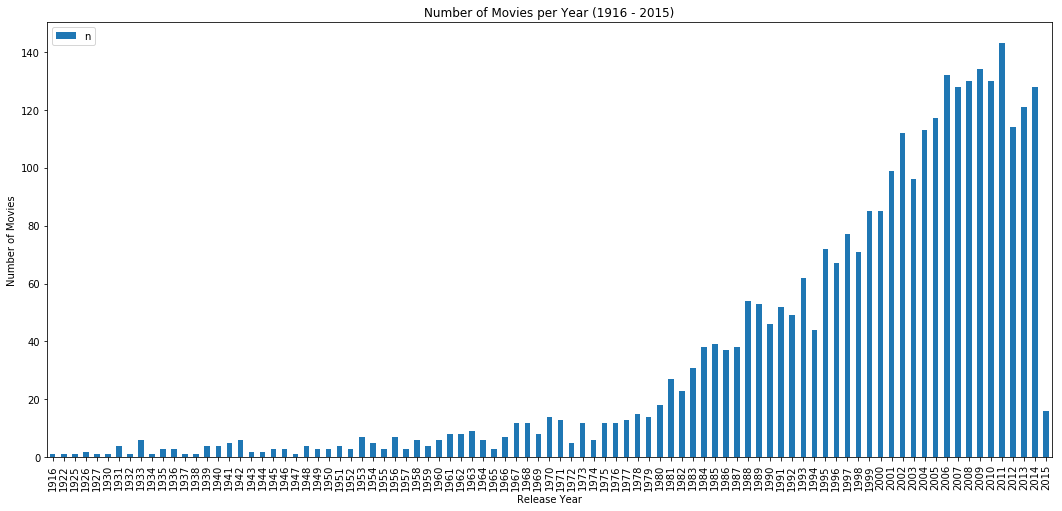

In [238]:
# Then, we plot a histogram of the number of movies released in each year

fig = plt.figure(figsize = (18,8))
ax = fig.add_subplot(111)

df_yearagg.plot(kind='bar', x='release_year', y='n', ax=ax)
ax.set_title('Number of Movies per Year (1916 - 2015)')
ax.set_ylabel('Number of Movies')
ax.set_xlabel('Release Year')
plt.show()

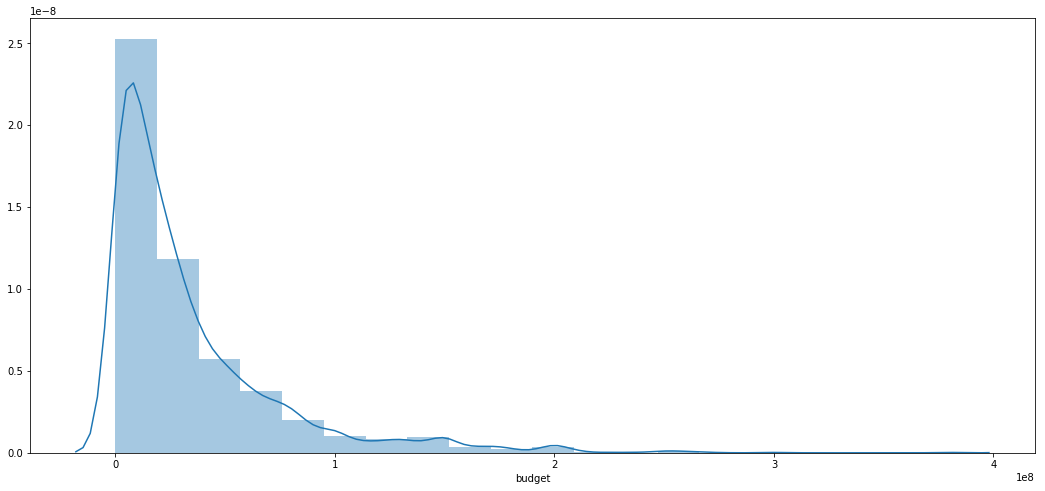

In [239]:
# Distribution of movie budgets within the dataset.

fig = plt.figure(figsize = (18, 8))
ax = fig.add_subplot(111)

sns.distplot(df_merged['budget'], kde = True, bins = 20, ax = ax)
plt.add_ylabel = 'Number of Movies'
plt.add_xlabel = 'Movie Budget'
plt.show()

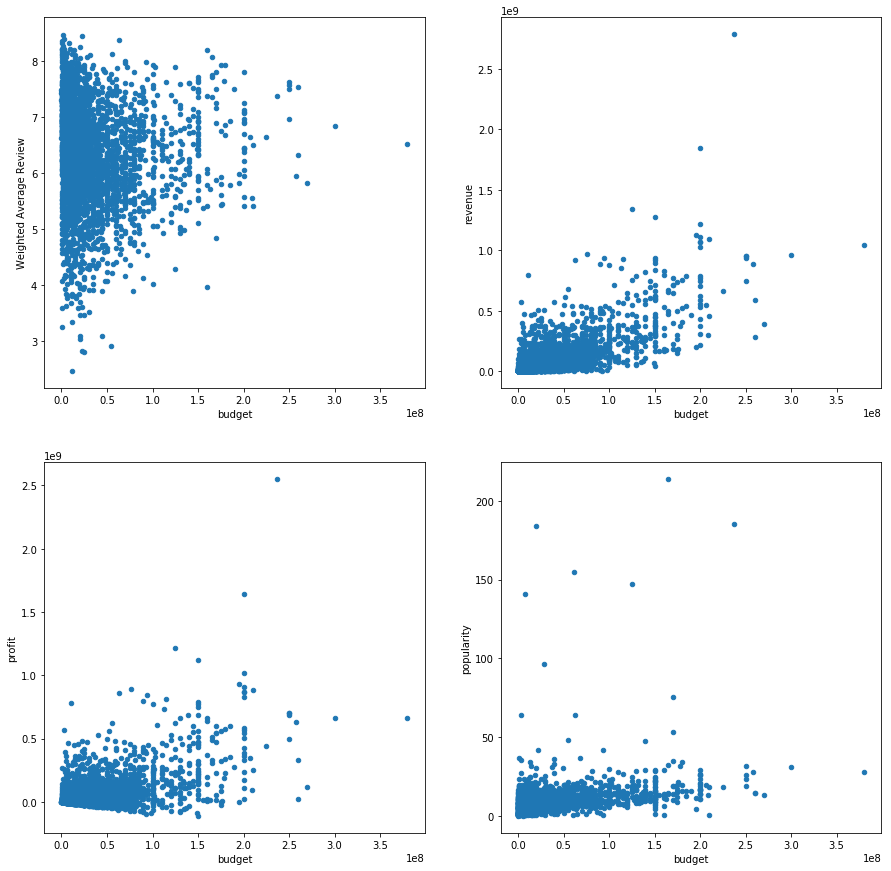

In [240]:
# Plot the independent variable 'budget' against a series of dependent variables in order to 
# determine any possible relationships

fig = plt.figure(figsize = (15, 15))

ax1 = fig.add_subplot(221)
df_merged.plot(kind = 'scatter', x = 'budget', y = 'Weighted Average Review', ax = ax1)

ax2 = fig.add_subplot(222)
df_merged.plot(kind = 'scatter', x = 'budget', y = 'revenue', ax = ax2)

df_merged['profit'] = df_merged['revenue'] - df_merged['budget']
ax3 = fig.add_subplot(223)
df_merged.plot(kind = 'scatter', x = 'budget', y = 'profit', ax = ax3)

ax4 = fig.add_subplot(224)
df_merged.plot(kind = 'scatter', x = 'budget', y = 'popularity', ax = ax4)

In [241]:
# However, the data above is a little bit opaque, as there seems to be an excess of data points clustered around one area.
# Since we cannot visually confirm any correlation, let's use a correlation matrix instead.

display(df_merged.corr())

,id,budget,popularity,revenue,runtime,average_rating_imdb,vote_count_imdb,release_year,average_rating_movielens,movie_award_count,num_awards_nominations_cast,num_prev_movies_of_crew,num_prev_movies_of_cast,Weighted Average Review,profit
id,1.00,-0.00,0.12,0.00,-0.04,-0.04,0.12,0.35,-0.03,-0.07,-0.08,-0.05,-0.02,-0.04,0.01
budget,-0.00,1.00,0.31,0.72,0.22,-0.04,0.57,0.32,-0.04,-0.10,0.19,0.45,0.38,-0.04,0.56
popularity,0.12,0.31,1.00,0.45,0.14,0.23,0.57,0.12,0.18,0.06,0.09,0.27,0.24,0.21,0.44
revenue,0.00,0.72,0.45,1.00,0.21,0.17,0.75,0.18,0.12,0.02,0.18,0.38,0.37,0.15,0.98
runtime,-0.04,0.22,0.14,0.21,1.00,0.35,0.21,-0.08,0.33,0.27,0.36,0.18,0.25,0.35,0.18
average_rating_imdb,-0.04,-0.04,0.23,0.17,0.35,1.00,0.35,-0.19,0.88,0.31,0.25,0.10,0.16,0.96,0.21
vote_count_imdb,0.12,0.57,0.57,0.75,0.21,0.35,1.00,0.22,0.30,0.05,0.17,0.42,0.39,0.34,0.73
release_year,0.35,0.32,0.12,0.18,-0.08,-0.19,0.22,1.00,-0.15,-0.24,-0.16,0.14,0.16,-0.18,0.12
average_rating_movielens,-0.03,-0.04,0.18,0.12,0.33,0.88,0.30,-0.15,1.00,0.32,0.28,0.08,0.16,0.97,0.16
movie_award_count,-0.07,-0.10,0.06,0.02,0.27,0.31,0.05,-0.24,0.32,1.00,0.41,0.02,0.11,0.33,0.05


The correlation matrix above shows that the budget of a movie has an extremely high correlation with its revenue of around 72%, yet this can't be seen clearly from the previous scatterplots.

At the same time, there is low correlation between budget and popularity, and negative correlation between it and the movie's weighted average review.

In [242]:
# In order to obtain a clearer visual representation that confirms the results of the correlation matrix, 
# we shall bin the values within 'budget' into 50 bins of equal size.

df_merged['binned'] = pd.cut(df_merged['budget'], 50)
df_merged.head()

,id,title,budget,genres,imdb_id,original_language,overview,popularity,production_companies,production_countries,...,cast,crew,formatted_cast,formatted_crew,num_awards_nominations_cast,num_prev_movies_of_crew,num_prev_movies_of_cast,Weighted Average Review,profit,binned
0,5,Four Rooms (1995),4000000,"['Comedy', 'Crime']",tt0113101,en,It's Ted the Bellhop's first night on the job....,9.03,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...","['Tim Roth', 'Antonio Banderas', 'Jennifer Bea...","['Combustible Edison', 'Gary Frutkoff', 'Lance...",5,716,176,6.62,300000.00,"(-377497.5, 7602450.0]"
1,12,Finding Nemo (2003),94000000,"['Animation', 'Comedy', 'Children', 'Adventure...",tt0266543,en,"Nemo, an adventurous young clownfish, is unexp...",25.50,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'cast_id': 8, 'character': 'Marlin (voice)',...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...","['Albert Brooks', 'Ellen DeGeneres', 'Alexande...","['Andrew Stanton', 'Andrew Stanton', 'Andrew S...",7,643,188,7.69,846335536.00,"(91201900.0, 98801850.0]"
2,13,Forrest Gump (1994),55000000,"['War', 'Drama', 'Romance', 'Comedy']",tt0109830,en,A man with a low IQ has accomplished great thi...,48.31,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'cast_id': 7, 'character': 'Forrest Gump', '...","[{'credit_id': '52fe420ec3a36847f800072d', 'de...","['Tom Hanks', 'Robin Wright', 'Gary Sinise', '...","['Robert Zemeckis', 'Wendy Finerman', 'Steve T...",10,1024,210,8.13,622945399.00,"(53202150.0, 60802100.0]"
3,14,American Beauty (1999),15000000,"['Drama', 'Comedy']",tt0169547,en,"Lester Burnham, a depressed suburban father in...",20.73,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'cast_id': 6, 'character': 'Lester Burnham',...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...","['Kevin Spacey', 'Annette Bening', 'Thora Birc...","['Sam Mendes', 'Alan Ball', 'Bruce Cohen', 'Da...",7,671,165,8.11,341296601.00,"(7602450.0, 15202400.0]"
4,15,Citizen Kane (1941),839727,"['Mystery', 'Drama']",tt0033467,en,"Newspaper magnate, Charles Foster Kane is take...",15.81,"[{'name': 'RKO Radio Pictures', 'id': 6}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'cast_id': 5, 'character': 'Charles Foster K...","[{'credit_id': '52fe420ec3a36847f8000885', 'de...","['Orson Welles', 'Joseph Cotten', 'Dorothy Com...","['Orson Welles', 'Orson Welles', 'Richard Baer...",7,419,513,8.13,22377947.00,"(-377497.5, 7602450.0]"


In [243]:
# Subsequently, we aggregate the data to obtain the mean for each variable within each range.

df_budgetagg = df_merged.groupby('binned').mean()
df_budgetagg.head()

,id,budget,popularity,revenue,runtime,average_rating_imdb,vote_count_imdb,release_year,average_rating_movielens,movie_award_count,num_awards_nominations_cast,num_prev_movies_of_crew,num_prev_movies_of_cast,Weighted Average Review,profit
binned,,,,,,,,,,,,,,,
"(-377497.5, 7602450.0]",30716.38,3257805.81,7.40,23434396.06,103.30,6.49,318.59,1987.22,3.34,0.26,3.05,120.35,86.17,6.59,20176590.25
"(7602450.0, 15202400.0]",33602.90,11673057.41,8.70,41415003.67,108.38,6.31,453.68,1998.05,3.20,0.20,3.54,171.42,122.82,6.36,29741946.27
"(15202400.0, 22802350.0]",32207.24,18986356.93,9.64,56825600.90,108.57,6.14,548.85,1999.34,3.10,0.19,3.44,226.67,127.15,6.17,37839243.98
"(22802350.0, 30402300.0]",28598.15,26759580.92,9.45,68848780.72,108.21,6.17,645.00,2001.64,3.15,0.16,4.03,252.55,142.29,6.24,42089199.79
"(30402300.0, 38002250.0]",24825.42,34615056.18,9.51,86000001.85,112.34,6.11,647.64,2000.83,3.09,0.13,4.37,275.31,148.37,6.14,51384945.67


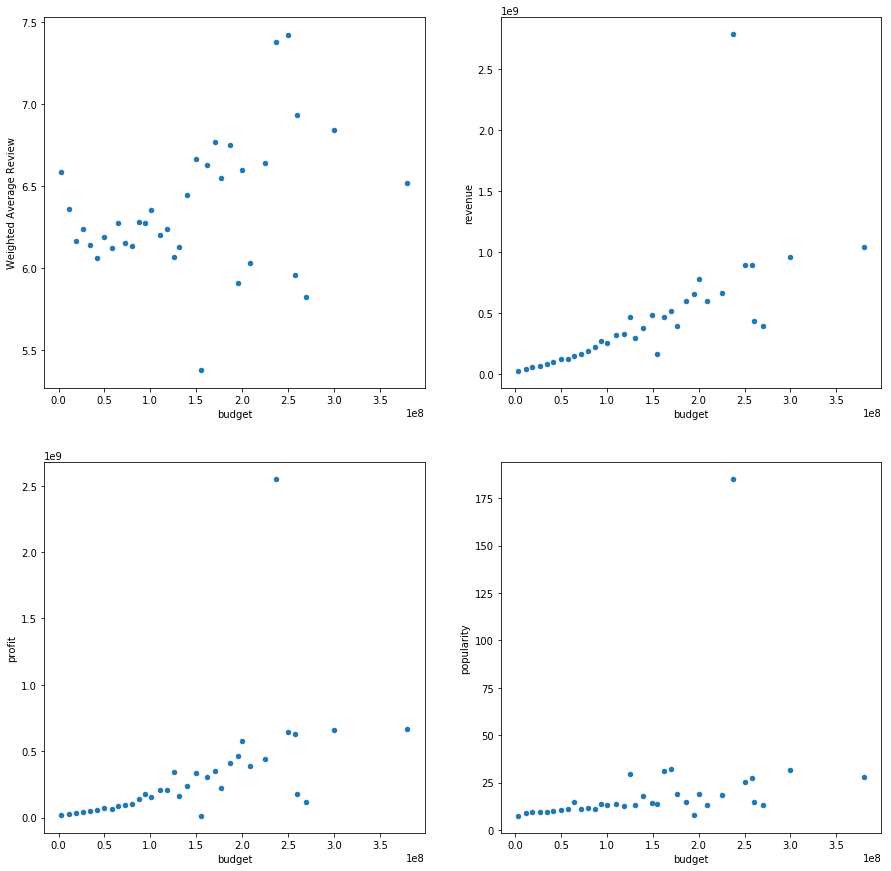

In [244]:
# Hence, we plot the same four plots again, this time with a clearer visual representation of the 
# correlation between movie budgets and our chosen variables
fig = plt.figure(figsize = (15, 15))

ax1 = fig.add_subplot(221)
df_budgetagg.plot(kind = 'scatter', x = 'budget', y = 'Weighted Average Review', ax = ax1)

ax2 = fig.add_subplot(222)
df_budgetagg.plot(kind = 'scatter', x = 'budget', y = 'revenue', ax = ax2)

df_merged['profit'] = df_merged['revenue'] - df_merged['budget']
ax3 = fig.add_subplot(223)
df_budgetagg.plot(kind = 'scatter', x = 'budget', y = 'profit', ax = ax3)

ax4 = fig.add_subplot(224)
df_budgetagg.plot(kind = 'scatter', x = 'budget', y = 'popularity', ax = ax4)

As seen is the plots above, there is now a much clearer visual depiction of the correlation between budget and revenue for a movie. As the aforementioned correlation is high, it hence explains why the plot of 'budget vs profit' looks so similar, as it is essentially a vertical translation of the 'budget vs revenue' graph downwards.

## EDA (Director)

In [245]:
# Before we move forwards, let's once again do some data cleaning in order to extract the names of the directors
# from the terribly, terribly formatted dataset.

def format_director(cast_series):

    cast_total = []
    
    # Only search for "'name':" and discard everything else
    director_search = re.compile(r"'department': 'Directing'(.)*'Director', 'name': [A-Z \'\"]+,?", re.I)
    #(.)* searches for 0 or more of any character 
    #regex string searches for "department: Directing .... 'Director', 'name': ....," (ending with the comma)
    #this is because there are sound/art directors etc. and we only want the main directors

    for movie in cast_series:
        cast_list = movie.split('}')
        cast_per_movie = []
        for cast in cast_list:
            if (len(cast) <= 2): #to factor for the last entry in movie.split(), which will be ']'
                continue
            else:
                try:
                    cast_name = re.search(director_search, cast)
                    cast_name = re.sub(".*'name'", '', cast_name[0]) #removes all characters before the name
                    cast_name = re.sub("[:,\']", '', cast_name) #these 3 rows remove special characters and leading and trailing spaces
                    cast_name = cast_name.strip()
                    cast_name = re.sub("^\'|\'$", "", cast_name)
                    cast_per_movie.append(cast_name)   
                except:
                    continue

        cast_total.append(cast_per_movie)
    return cast_total

In [246]:
df_merged['director'] = format_director(df_merged['crew'])
df_merged.head()

,id,title,budget,genres,imdb_id,original_language,overview,popularity,production_companies,production_countries,...,crew,formatted_cast,formatted_crew,num_awards_nominations_cast,num_prev_movies_of_crew,num_prev_movies_of_cast,Weighted Average Review,profit,binned,director
0,5,Four Rooms (1995),4000000,"['Comedy', 'Crime']",tt0113101,en,It's Ted the Bellhop's first night on the job....,9.03,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'credit_id': '52fe420dc3a36847f800011b', 'de...","['Tim Roth', 'Antonio Banderas', 'Jennifer Bea...","['Combustible Edison', 'Gary Frutkoff', 'Lance...",5,716,176,6.62,300000.00,"(-377497.5, 7602450.0]","[Allison Anders, Alexandre Rockwell, Robert Ro..."
1,12,Finding Nemo (2003),94000000,"['Animation', 'Comedy', 'Children', 'Adventure...",tt0266543,en,"Nemo, an adventurous young clownfish, is unexp...",25.50,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'credit_id': '52fe420ec3a36847f80006b1', 'de...","['Albert Brooks', 'Ellen DeGeneres', 'Alexande...","['Andrew Stanton', 'Andrew Stanton', 'Andrew S...",7,643,188,7.69,846335536.00,"(91201900.0, 98801850.0]",[Andrew Stanton]
2,13,Forrest Gump (1994),55000000,"['War', 'Drama', 'Romance', 'Comedy']",tt0109830,en,A man with a low IQ has accomplished great thi...,48.31,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'credit_id': '52fe420ec3a36847f800072d', 'de...","['Tom Hanks', 'Robin Wright', 'Gary Sinise', '...","['Robert Zemeckis', 'Wendy Finerman', 'Steve T...",10,1024,210,8.13,622945399.00,"(53202150.0, 60802100.0]",[Robert Zemeckis]
3,14,American Beauty (1999),15000000,"['Drama', 'Comedy']",tt0169547,en,"Lester Burnham, a depressed suburban father in...",20.73,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'credit_id': '52fe420ec3a36847f80007c5', 'de...","['Kevin Spacey', 'Annette Bening', 'Thora Birc...","['Sam Mendes', 'Alan Ball', 'Bruce Cohen', 'Da...",7,671,165,8.11,341296601.00,"(7602450.0, 15202400.0]",[Sam Mendes]
4,15,Citizen Kane (1941),839727,"['Mystery', 'Drama']",tt0033467,en,"Newspaper magnate, Charles Foster Kane is take...",15.81,"[{'name': 'RKO Radio Pictures', 'id': 6}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'credit_id': '52fe420ec3a36847f8000885', 'de...","['Orson Welles', 'Joseph Cotten', 'Dorothy Com...","['Orson Welles', 'Orson Welles', 'Richard Baer...",7,419,513,8.13,22377947.00,"(-377497.5, 7602450.0]",[Orson Welles]


In [247]:
# Some movies have multiple directors. The below function serves to split the list of directors to individual ones,
# and duplicating the values in the other columns for each co-director.

def splitDirectors(dataframe):
    
    dict_directors = {}
    list_dicts = []
    x = 0

    for directorlist in dataframe['director']:
            
        for director in directorlist:
            
            dict_directors = dataframe.loc[x].to_dict()
            dict_directors['director_formatted'] = director
            list_dicts.append(dict_directors)
            
        x+=1
            
    return list_dicts

In [248]:
df_director = pd.DataFrame(splitDirectors(df_merged))
df_director[['title','director_formatted', 'revenue', 'budget', 'Weighted Average Review']].head()

,title,director_formatted,revenue,budget,Weighted Average Review
0,Four Rooms (1995),Allison Anders,4300000.00,4000000,6.62
1,Four Rooms (1995),Alexandre Rockwell,4300000.00,4000000,6.62
2,Four Rooms (1995),Robert Rodriguez,4300000.00,4000000,6.62
3,Four Rooms (1995),Quentin Tarantino,4300000.00,4000000,6.62
4,Finding Nemo (2003),Andrew Stanton,940335536.00,94000000,7.69


In [249]:
# Let's get to the fun part. Now, we want to see who are the best directors all-around - i.e. they have the highest 
# mean Weighted Average Review for movies that they have directed.

df_directormean = df_director.groupby('director_formatted').mean().sort_values('Weighted Average Review', ascending = False)

df_directormean.head(10)

,Weighted Average Review,average_rating_imdb,average_rating_movielens,budget,id,movie_award_count,num_awards_nominations_cast,num_prev_movies_of_cast,num_prev_movies_of_crew,popularity,profit,release_year,revenue,runtime,vote_count_imdb
director_formatted,,,,,,,,,,,,,,,
Charlie Chaplin,8.27,8.20,4.17,1500000.00,901.00,0.00,0.00,65.00,104.00,10.89,-1480819.00,1931.00,19181.00,87.00,444.00
Tony Kaye,8.25,8.20,4.15,20000000.00,73.00,1.00,4.00,144.00,718.00,18.16,3875127.00,1998.00,23875127.00,119.00,3120.00
Damien Chazelle,8.22,8.30,4.07,3300000.00,244786.00,1.00,0.00,337.00,229.00,64.30,9792000.00,2014.00,13092000.00,105.00,4376.00
Aditya Chopra,8.21,9.10,3.66,13200000.00,19404.00,0.00,0.00,37.00,54.00,34.46,86800000.00,1995.00,100000000.00,190.00,661.00
Robert Mulligan,8.14,7.90,4.19,2000000.00,595.00,2.00,15.00,222.00,454.00,14.28,11129846.00,1962.00,13129846.00,129.00,676.00
Akira Kurosawa,8.12,7.90,4.17,11500000.00,11645.00,0.00,0.00,54.00,197.00,12.25,-7430347.00,1985.00,4069653.00,162.00,349.00
Louis C,8.11,8.10,4.06,250000.00,80379.00,0.00,0.00,4.00,23.00,4.30,750000.00,2011.00,1000000.00,62.00,80.00
Terry Jones,8.07,7.80,4.17,400000.00,762.00,0.00,0.00,46.00,48.00,10.43,4628948.00,1975.00,5028948.00,91.00,1742.00
Orson Welles,8.06,7.80,4.16,834363.50,747.50,0.50,7.50,300.00,280.00,12.74,11898206.00,1949.50,12732569.50,107.00,768.00


In [250]:
# Charlie Chaplin really is a moviemaking genius! 
# Let's break down all the movies he has directed and take a look what we can learn.

df_chaplin = df_director[df_director['director_formatted'] == 'Charlie Chaplin']
df_chaplin.head()

# Unfortunately, we realise that the movie database contains only one movie which belongs to him.
# Let's clean up the data abit more, so we have a fairer view of a director's movies

,Weighted Average Review,average_rating_imdb,average_rating_movielens,binned,budget,cast,crew,director,director_formatted,formatted_cast,...,production_countries,profit,release_date,release_year,revenue,runtime,spoken_languages,status,title,vote_count_imdb
379,8.27,8.20,4.17,"(-377497.5, 7602450.0]",1500000,"[{'cast_id': 11, 'character': 'Tramp', 'credit...","[{'credit_id': '52fe428ac3a36847f8026bc9', 'de...",[Charlie Chaplin],Charlie Chaplin,"['Charlie Chaplin', 'Virginia Cherrill', 'Flor...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",-1480819.00,1931-01-30,1931,19181.00,87.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,City Lights (1931),444


In [251]:
# Here, we filter out only directors who have more than 3 movies in the database
df_cleaned = df_director.groupby('director_formatted').filter(lambda x: len(x) > 3)
df_directormean = df_cleaned.groupby('director_formatted').mean().sort_values('Weighted Average Review', ascending = False)
df_directormean[:10]

,Weighted Average Review,average_rating_imdb,average_rating_movielens,budget,id,movie_award_count,num_awards_nominations_cast,num_prev_movies_of_cast,num_prev_movies_of_crew,popularity,profit,release_year,revenue,runtime,vote_count_imdb
director_formatted,,,,,,,,,,,,,,,
Billy Wilder,7.78,7.67,3.95,2150820.50,17626.33,0.83,7.00,121.67,160.17,6.60,6465846.17,1953.00,8616666.67,111.50,318.33
Frank Capra,7.78,7.72,3.91,1976250.00,1998.50,1.75,14.00,284.50,93.75,8.08,5209781.00,1945.00,7186031.00,125.00,414.00
Christopher Nolan,7.76,7.63,3.94,88334333.33,32811.67,0.00,12.33,201.00,480.83,20.33,249725310.33,2004.83,338059643.67,126.17,6414.17
Stanley Kubrick,7.65,7.60,3.85,17042857.14,983.71,0.29,6.57,119.71,141.14,13.45,36648450.86,1973.57,53691308.00,150.43,1401.43
Quentin Tarantino,7.63,7.56,3.86,31133333.33,9929.33,0.67,5.22,298.22,742.00,30.61,121667619.67,2001.44,152800953.00,131.44,4668.44
David Yates,7.62,7.55,3.85,193750000.00,6582.75,0.00,15.00,527.75,524.00,22.18,848369450.75,2009.25,1042119450.75,141.75,5729.25
Alfred Hitchcock,7.58,7.42,3.87,2083065.24,2136.29,0.41,7.12,77.71,199.41,10.58,10825996.82,1956.35,12909062.06,115.06,564.24
Wes Anderson,7.55,7.35,3.87,18000000.00,29802.75,0.00,10.00,139.75,140.25,7.57,15097577.75,2003.75,33097577.75,91.25,970.00
Sidney Lumet,7.54,7.42,3.83,6658333.33,6515.50,1.33,10.17,135.67,189.33,12.44,14807937.83,1982.33,21466271.17,118.83,688.83


In [252]:
# Christopher Nolan seems a familiar name, and is even the third-highest ranked director on this list!
# Let's take a look at his movies.

df_nolan = df_director[df_director['director_formatted'] == 'Christopher Nolan']
len(df_nolan.index)

# Nolan has 6 movies in this dataframe.

6

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

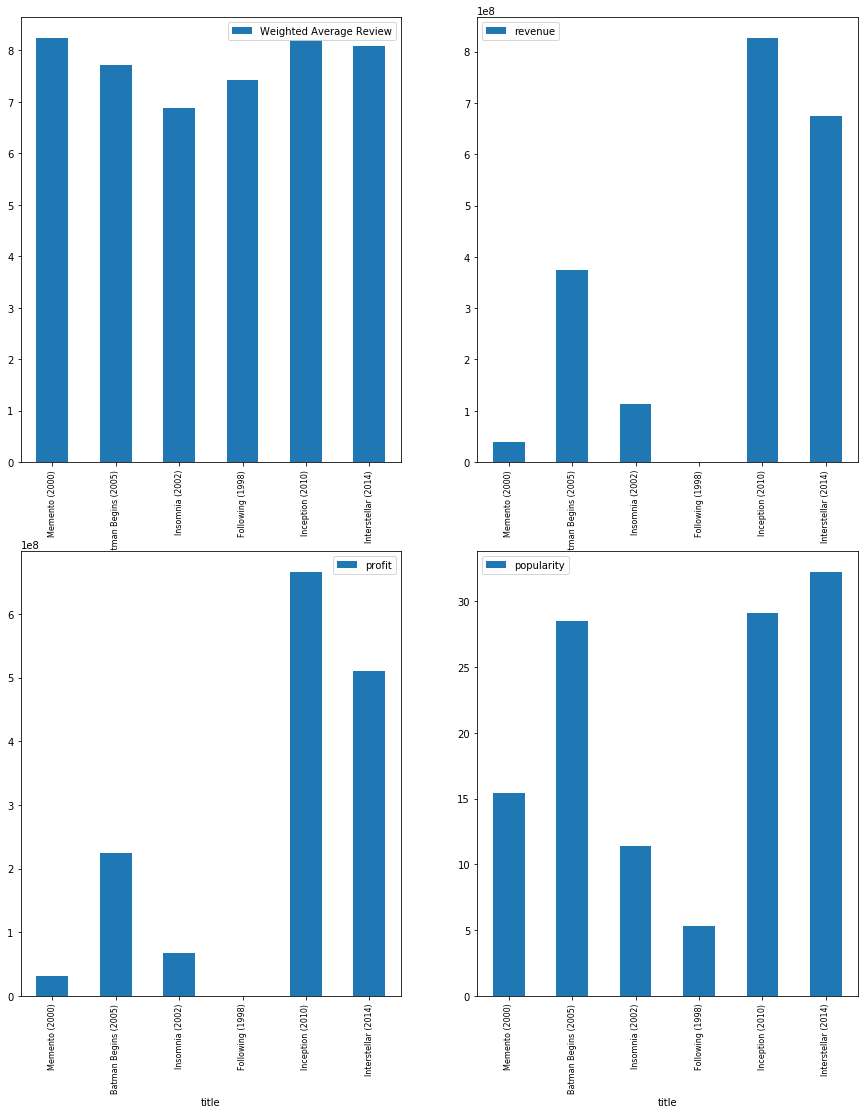

In [253]:
# Now, let us visualize some of the data we got from Christopher Nolan.

fig = plt.figure(figsize = (15, 18))

ax1 = fig.add_subplot(221)
df_nolan.plot(kind = 'bar', x = 'title', y = 'Weighted Average Review', ax = ax1)
plt.xticks(fontsize = 8)

ax2 = fig.add_subplot(222)
df_nolan.plot(kind = 'bar', x = 'title', y = 'revenue', ax = ax2)
plt.xticks(fontsize = 8)

df_nolan['profit'] = df_nolan['revenue'] - df_nolan['budget']
ax3 = fig.add_subplot(223)
df_nolan.plot(kind = 'bar', x = 'title', y = 'profit', ax = ax3)
plt.xticks(fontsize = 8)

ax4 = fig.add_subplot(224)
df_nolan.plot(kind = 'bar', x = 'title', y = 'popularity', ax = ax4)
plt.xticks(fontsize = 8)

Hence, we can see that for movies that a director is in charge of, a higher rating may not actually translate to higher revenue or profits. For example, while the Following (1998) is rated higher than Insomnia (2002), it actually brought in a much lower revenue as compared to the latter.

## EDA (Cast Members Awards)

In [254]:
# Taking only the relevant data into a new dataframe
awards_df = pd.DataFrame(data = {'Total Number of Cast Members Awards':df_merged['num_awards_nominations_cast'], 'Revenue':df_merged['revenue'], 'Weighted Average Review':df_merged['Weighted Average Review']})
awards_df.head()

,Total Number of Cast Members Awards,Revenue,Weighted Average Review
0,5,4300000.00,6.62
1,7,940335536.00,7.69
2,10,677945399.00,8.13
3,7,356296601.00,8.11
4,7,23217674.00,8.13


In [255]:
# Aggregating data by the number of awards received by the cast members and taking the mean revenue and review of that category
new_awards_df = awards_df.groupby('Total Number of Cast Members Awards').mean().reset_index()
new_awards_df.head()

,Total Number of Cast Members Awards,Revenue,Weighted Average Review
0,0,55822020.88,6.07
1,1,77538630.06,6.11
2,2,88290450.22,6.27
3,3,119453394.51,6.39
4,4,103127724.01,6.34


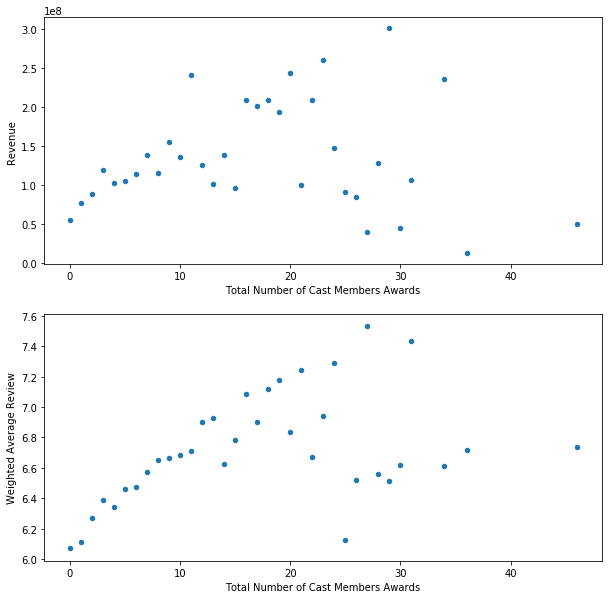

In [256]:
# Plotting the data to get a sensing of the correlation between Number of Cast Awards and its revenue and review
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
new_awards_df.plot(kind='scatter', x='Total Number of Cast Members Awards', y='Revenue', ax=ax1)
new_awards_df.plot(kind='scatter', x='Total Number of Cast Members Awards', y='Weighted Average Review', ax=ax2)

There appears to be a weak linear correlation between the total number of awards the cast members have received before to the movie's revenue and review score.

## EDA (Cast Members Movies)

In [257]:
# Taking only the relevant data into a new dataframe
cast_movies_df = pd.DataFrame(data = {'Total Number of Movies Cast Members Acted':df_merged['num_prev_movies_of_cast'], 'Revenue':df_merged['revenue'], 'Weighted Average Review':df_merged['Weighted Average Review']})
cast_movies_df.head()

,Total Number of Movies Cast Members Acted,Revenue,Weighted Average Review
0,176,4300000.00,6.62
1,188,940335536.00,7.69
2,210,677945399.00,8.13
3,165,356296601.00,8.11
4,513,23217674.00,8.13


In [258]:
# Aggregating data by the number of movies acted by the cast members before and taking the mean revenue and review of that category
new_cast_movies_df = cast_movies_df.groupby('Total Number of Movies Cast Members Acted').mean().reset_index()
new_cast_movies_df.head()

,Total Number of Movies Cast Members Acted,Revenue,Weighted Average Review
0,0,11334184.00,6.29
1,1,593858.00,7.09
2,2,340147.00,6.41
3,3,7808524.00,7.23
4,4,21466913.00,7.19


In [259]:
# Further aggregation of data to establish more meaningful results
final_cast_movies_df = new_cast_movies_df.groupby(pd.cut(new_cast_movies_df['Total Number of Movies Cast Members Acted'], np.arange(0, 1000, 100))).mean().reset_index(drop=True)
final_cast_movies_df

,Total Number of Movies Cast Members Acted,Revenue,Weighted Average Review
0,50.50,36972556.00,6.26
1,150.50,117340752.22,6.39
2,248.37,173369530.16,6.47
3,345.80,217883325.23,6.79
4,449.85,224973266.49,6.81
5,540.38,176592628.43,6.95
6,631.10,549829845.30,6.83
7,747.00,344533393.33,6.71
8,842.00,266465037.00,7.53


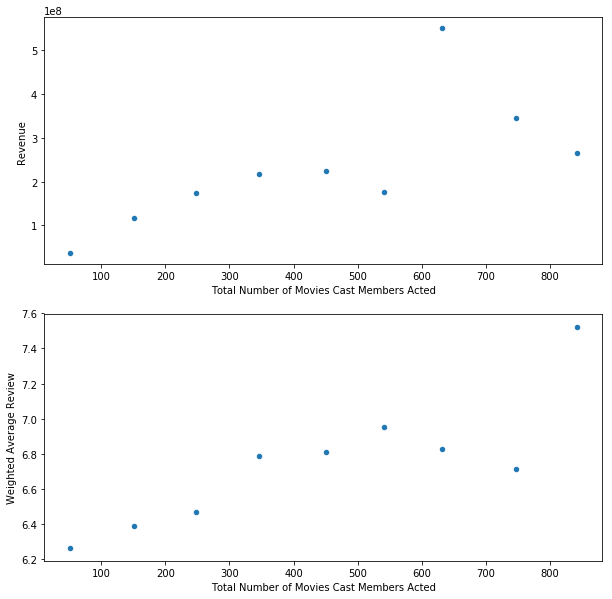

In [260]:
# Plotting the data to get a sensing of the correlation between Number of Movies Cast have acted in before and its revenue and review
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
final_cast_movies_df.plot(kind='scatter', x='Total Number of Movies Cast Members Acted', y='Revenue', ax=ax1)
final_cast_movies_df.plot(kind='scatter', x='Total Number of Movies Cast Members Acted', y='Weighted Average Review', ax=ax2)

There appears to be a weak linear correlation between the total number of movies that the cast members have have acted in before to the movie's revenue and review score.

## EDA (Movie Length)

In [261]:
# Taking only the relevant data into a new dataframe
runtime_df = pd.DataFrame(data = {'Runtime':df_merged['runtime'], 'Revenue':df_merged['revenue'],  'Weighted Average Review':df_merged['Weighted Average Review']})
runtime_df.head()

,Runtime,Revenue,Weighted Average Review
0,98.00,4300000.00,6.62
1,100.00,940335536.00,7.69
2,142.00,677945399.00,8.13
3,122.00,356296601.00,8.11
4,119.00,23217674.00,8.13


In [262]:
# Aggregating data by the length of movies and taking the mean revenue and review of that movie length
new_runtime_df = runtime_df.groupby('Runtime').mean().reset_index()
new_runtime_df.head()

,Runtime,Revenue,Weighted Average Review
0,62.00,1000000.00,8.11
1,63.00,14460000.00,6.87
2,64.00,1600000.00,6.89
3,65.00,480000.00,4.82
4,66.00,1887311.50,5.49


In [263]:
# Further aggregation of data to establish more meaningful results
final_runtime_df = new_runtime_df.groupby(pd.cut(new_runtime_df['Runtime'], np.arange(50, 350, 25))).mean().reset_index(drop=True)
final_runtime_df

,Runtime,Revenue,Weighted Average Review
0,68.54,53196274.91,6.58
1,88.00,64873405.04,6.01
2,113.00,93307513.86,6.44
3,138.00,190409723.22,6.88
4,162.09,223451130.01,7.04
5,186.75,237407766.16,7.28
6,213.40,38920367.00,7.16
7,243.00,235588229.50,7.21
8,nan,nan,nan
9,nan,nan,nan


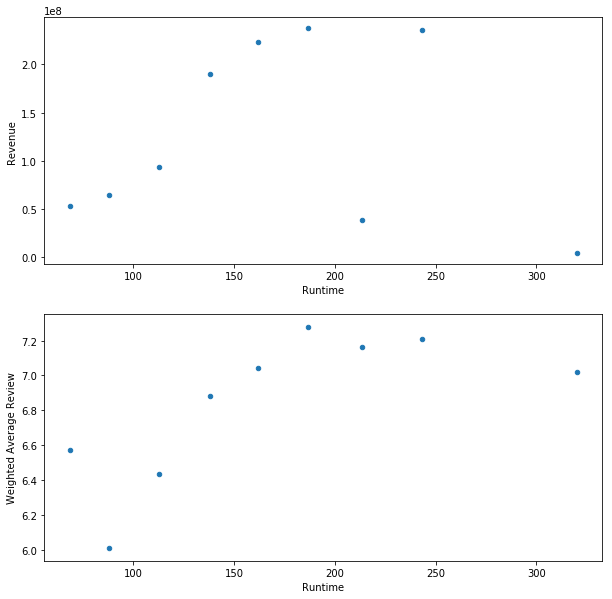

In [264]:
# Plotting the data to get a sensing of the correlation between Number of Movies Cast have acted in before and its revenue and review
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
final_runtime_df.plot(kind='scatter', x='Runtime', y='Revenue', ax=ax1)
final_runtime_df.plot(kind='scatter', x='Runtime', y='Weighted Average Review', ax=ax2)

There seems to be some correlation between the movie's runtime to the its revenue and review score.

## EDA (Genre)

In [265]:
# Taking only the relevant data into a new dataframe
genres_df = pd.DataFrame(data = {'Genres':df_merged['genres'], 'Revenue':df_merged['revenue'], 'Weighted Average Review':df_merged['Weighted Average Review']})
genres_df.head()

,Genres,Revenue,Weighted Average Review
0,"['Comedy', 'Crime']",4300000.00,6.62
1,"['Animation', 'Comedy', 'Children', 'Adventure...",940335536.00,7.69
2,"['War', 'Drama', 'Romance', 'Comedy']",677945399.00,8.13
3,"['Drama', 'Comedy']",356296601.00,8.11
4,"['Mystery', 'Drama']",23217674.00,8.13


In [266]:
# Changing the data in Genres from a Series of strings to a Series of Arrays of Strings so they can be used for analysis
gen_work_df = pd.DataFrame(data = {'Genres':df_merged['genres']})
gen_final = []
for x in gen_work_df['Genres']:
    x = re.sub("[\{'id': [0-9]+ ",'',x)
    x = re.sub("\'",'',x)
    x = re.sub(" ",'',x)
    x = re.sub("\[",'',x)
    x = re.sub("\]",'',x)
    x = x.split(",") 
    gen_final.append(x)
gen_final_df = pd.DataFrame()
gen_final_df['Genres'] = gen_final
gen_final_df.head()

,Genres
0,"[Comedy, Crime]"
1,"[Animation, Comedy, Children, Adventure, Family]"
2,"[War, Drama, Romance, Comedy]"
3,"[Drama, Comedy]"
4,"[Mystery, Drama]"


In [267]:
# Finding all the genres that appeared in the Dataframe
genres_list = []
for x in gen_final_df['Genres']:
    for y in x:
        if y not in genres_list:
            genres_list.append(y)
genres_list

['Comedy',
 'Crime',
 'Animation',
 'Children',
 'Adventure',
 'Family',
 'War',
 'Drama',
 'Romance',
 'Mystery',
 'Musical',
 'Music',
 'ScienceFiction',
 'Sci-Fi',
 'Action',
 'Fantasy',
 'Thriller',
 'Western',
 'IMAX',
 'Horror',
 'Film-Noir',
 'History',
 'Documentary',
 '',
 'TVMovie',
 'Foreign']

In [268]:
# There exists a film with a null genre, thus we need to drop it from genres_list
for x in gen_final_df['Genres']:
    for y in x:
        if y == '':
# This is to ensure the entry was not completely null. It was only a null string in an array which was not a null array.
            print(x)

if '' in genres_list:
    genres_list.remove('')
genres_list

['', 'Documentary']


['Comedy',
 'Crime',
 'Animation',
 'Children',
 'Adventure',
 'Family',
 'War',
 'Drama',
 'Romance',
 'Mystery',
 'Musical',
 'Music',
 'ScienceFiction',
 'Sci-Fi',
 'Action',
 'Fantasy',
 'Thriller',
 'Western',
 'IMAX',
 'Horror',
 'Film-Noir',
 'History',
 'Documentary',
 'TVMovie',
 'Foreign']

In [269]:
# Creating a final Dataframe to perform data aggregation by Genres
gen_final_df['Revenue'] = df_merged['revenue']
gen_final_df['Review'] = genres_df['Weighted Average Review']
gen_final_df.head()

,Genres,Revenue,Review
0,"[Comedy, Crime]",4300000.00,6.62
1,"[Animation, Comedy, Children, Adventure, Family]",940335536.00,7.69
2,"[War, Drama, Romance, Comedy]",677945399.00,8.13
3,"[Drama, Comedy]",356296601.00,8.11
4,"[Mystery, Drama]",23217674.00,8.13


In [270]:
# Here we aggregate the data by genres
revenue_by_genre = []
number_by_genre = []
review_by_genre = []

for genretypes in genres_list:
    revenue_sum = 0
    review_sum = 0
    index = 0
    n = 0
    for genrearray in gen_final_df['Genres']:
        for genre in genrearray:
            if genre == genretypes:
                revenue = gen_final_df['Revenue'][index]
                review = gen_final_df['Review'][index]
                revenue_sum = revenue_sum + revenue
                review_sum = review_sum + review
                n = n + 1
        index = index + 1
    revenue_by_genre.append(revenue_sum)
    review_by_genre.append(review_sum)
    number_by_genre.append(n)

revenue_by_genre = []
for genretypes in genres_list:
    revenue_sum = 0
    index = 0
    for genrearray in gen_final_df['Genres']:
        for genre in genrearray:
            if genre == genretypes:
                revenue = gen_final_df['Revenue'][index]
                review = gen_final_df['Review'][index]
                revenue_sum = revenue_sum + revenue
                review_sum = review_sum + review
        index = index + 1
    revenue_by_genre.append(revenue_sum)

In [271]:
# This is the Dataframe containing information we want for our data visualisation
gen_rev_df = pd.DataFrame(data = {'Genres':genres_list, 'Total Revenue':revenue_by_genre, 'Total Review':review_by_genre,'n':number_by_genre})
gen_rev_df['Average Revenue'] = gen_rev_df['Total Revenue'] / gen_rev_df['n']
gen_rev_df['Average Review'] = gen_rev_df['Total Review'] / gen_rev_df['n']
gen_rev_df.head()

,Genres,Total Revenue,Total Review,n,Average Revenue,Average Review
0,Comedy,118762829634.00,7491.93,1215,97747184.88,6.17
1,Crime,48911182761.00,4342.14,674,72568520.42,6.44
2,Animation,38863063838.00,972.67,149,260825931.80,6.53
3,Children,44427771652.00,1280.78,207,214626916.19,6.19
4,Adventure,137510527911.00,4333.11,698,197006486.98,6.21


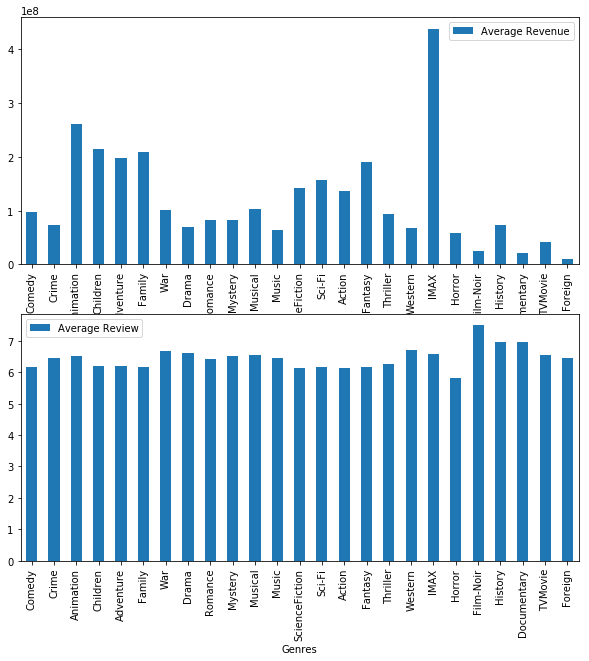

In [272]:
# Data Visualisation of Movies' Revenue and Review by Genres
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
gen_rev_df.plot(kind='bar', x='Genres', y='Average Revenue', ax=ax1)
gen_rev_df.plot(kind='bar', x='Genres', y='Average Review', ax=ax2)

There seems to be no apparent correlation between a movie's revenue and review to the genre it belongs to.

However, it appears that IMAX movies tend to generate more revenue than other genres of movies.

## EDA (Plot Keywords)

In [273]:
# Taking only the relevant data into a new dataframe
plotkeywords_df = pd.DataFrame(data = {'Plot Keywords':df_merged['plot_keywords'], 'Revenue':df_merged['revenue'], 'Review':genres_df['Weighted Average Review']})
plotkeywords_df.head()

,Plot Keywords,Revenue,Review
0,"['woman', 'gagged woman', 'tied to a chair', '...",4300000.00,6.62
1,"['shark', 'great barrier reef', 'short term me...",940335536.00,7.69
2,"['vietnam war', 'amputee', 'war hero', 'vietna...",677945399.00,8.13
3,"['midlife crisis', 'adulterous wife', 'unfaith...",356296601.00,8.11
4,"['new york', 'narcissism', 'materialism', 'new...",23217674.00,8.13


In [274]:
# Changing the Plot Keywords from a Series of strings to a Series of lists of strings
word_work_df = pd.DataFrame(data = {'words':df_merged['plot_keywords']})
word_final = []
for x in word_work_df['words']:
    x = re.sub('\[','',x)
    x = re.sub('\'','',x)
    x = re.sub("\]",'',x)
    x = x.split(",") 
    word_final.append(x)
word_final_df = pd.DataFrame()
word_final_df['Plot Keywords'] = word_final
word_final_df.head()

,Plot Keywords
0,"[woman, gagged woman, tied to a chair, weap..."
1,"[shark, great barrier reef, short term memor..."
2,"[vietnam war, amputee, war hero, vietnam, ..."
3,"[midlife crisis, adulterous wife, unfaithful..."
4,"[new york, narcissism, materialism, newspap..."


In [275]:
# Getting the individual strings out from the Plot Keywords series
clean_word_final = []
for array in word_final:
    clean_word_final_sub = []
    for word in array:
        word = re.sub('[\'-_,$&!.;%"]', '', word)
        word = word.strip().lower()
        clean_word_final_sub.append(word)
        clean_word_final.append(word)
display(clean_word_final[0:10])

['woman',
 'gagged woman',
 'tied to a chair',
 'weapon',
 'revolver',
 'shark',
 'great barrier reef',
 'short term memory loss',
 'protective father',
 'sydney harbor bridge']

In [276]:
# Joining the strings to form a long string of individual words)
full_list = " ".join(clean_word_final)
full_list[0:100]

'woman gagged woman tied to a chair weapon revolver shark great barrier reef short term memory loss p'

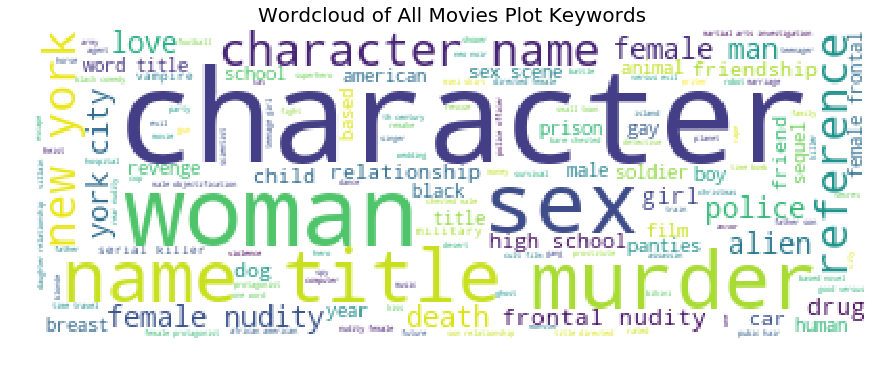

In [277]:
# Data Visualisation
plt.figure(figsize=(15,8))
wc = WordCloud(width=400, height=150, background_color="white", max_words=150, relative_scaling=0.5)
plotkeywords_wordcloud = wc.generate(full_list)

plt.imshow(plotkeywords_wordcloud)
plt.axis("off")
plt.title("Wordcloud of All Movies Plot Keywords", fontsize=20)
plt.show()

# The output of this cell does not show any correlation with the movies' revenue nor its review.
# Hence, we sought to find a way to visually represent the correlation through the following means as done in our next few cells.

In [278]:
# Splitting the dataset into the significant percentiles to individually visually represent them
revenue_90 = np.percentile(plotkeywords_df['Revenue'],90)
revenue_75 = np.percentile(plotkeywords_df['Revenue'],75)
revenue_50 = np.percentile(plotkeywords_df['Revenue'],50)
review_90 = np.percentile(plotkeywords_df['Review'],90)
review_75 = np.percentile(plotkeywords_df['Review'],75)
review_50 = np.percentile(plotkeywords_df['Review'],50)

In [279]:
# Creating Dataframes for each percentile group
revenue_90_df = plotkeywords_df[
    plotkeywords_df['Revenue'] > revenue_90
] 
revenue_75_df = plotkeywords_df[
    plotkeywords_df['Revenue'] > revenue_75
] 
revenue_50_df = plotkeywords_df[
    plotkeywords_df['Revenue'] > revenue_50
]
review_90_df = plotkeywords_df[
    plotkeywords_df['Review'] > review_90
] 
review_75_df = plotkeywords_df[
    plotkeywords_df['Review'] > review_75
] 
review_50_df = plotkeywords_df[
    plotkeywords_df['Review'] > review_50
] 
revenue_90_list = revenue_90_df['Plot Keywords'].tolist()
revenue_75_list = revenue_75_df['Plot Keywords'].tolist()
revenue_50_list = revenue_50_df['Plot Keywords'].tolist()
review_90_list = review_90_df['Plot Keywords'].tolist()
review_75_list = review_75_df['Plot Keywords'].tolist()
review_50_list = review_50_df['Plot Keywords'].tolist()

In [280]:
def word_cleaning(word_array):
    clean_word_final = []
    for word in word_array:
        word = re.sub('[\'-_,$&!.;%"]', '', word)
        word = word.strip().lower()
        clean_word_final.append(word)
    return clean_word_final

In [281]:
# Creating strings for each percentiles so as to perform a word cloud visualisation on each group
clean_word_final_revenue90 = word_cleaning(revenue_90_list)
clean_word_final_revenue75 = word_cleaning(revenue_75_list)
clean_word_final_revenue50 = word_cleaning(revenue_50_list)
clean_word_final_review90 = word_cleaning(review_90_list)
clean_word_final_review75 = word_cleaning(review_75_list)
clean_word_final_review50 = word_cleaning(review_50_list)
cwf_revenue90 = " ".join(clean_word_final_revenue90)
cwf_revenue75 = " ".join(clean_word_final_revenue75)
cwf_revenue50 = " ".join(clean_word_final_revenue50)
cwf_review90 = " ".join(clean_word_final_review90)
cwf_review75 = " ".join(clean_word_final_review75)
cwf_review50 = " ".join(clean_word_final_review50)

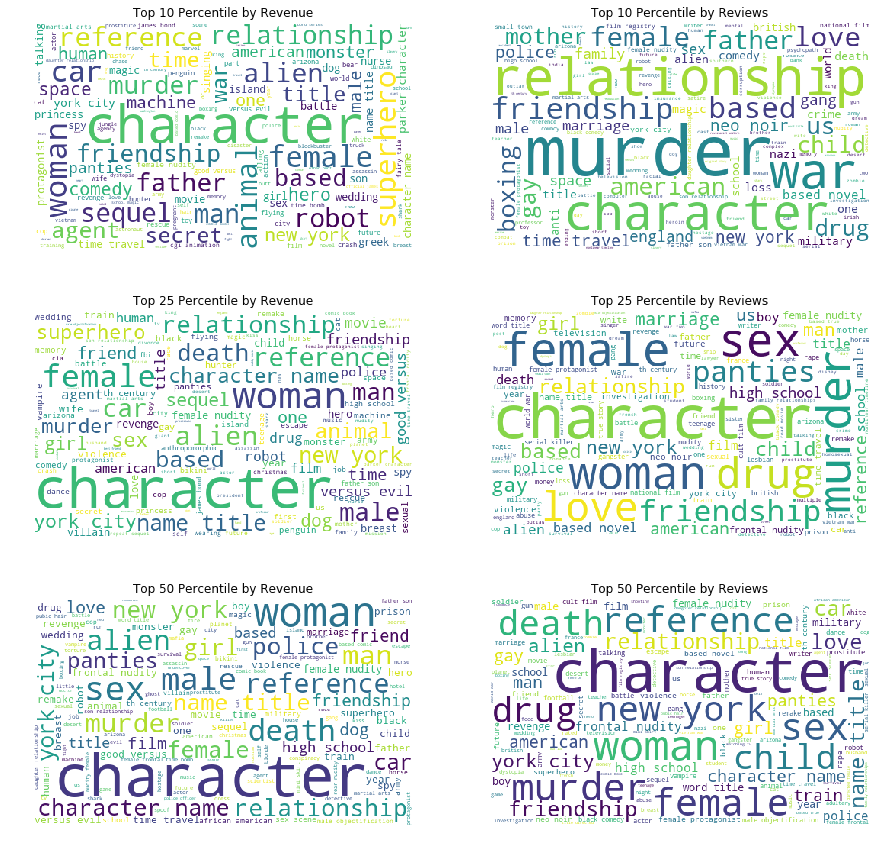

In [282]:
# A more intuitive visual representation of the correlation between the plot keywords and the movies' review/revenue
fig = plt.figure(figsize=(15,15))
wc1 = WordCloud(width=500, height=300, background_color="white", max_words=150, relative_scaling=0.5)
wc2 = WordCloud(width=500, height=300, background_color="white", max_words=150, relative_scaling=0.5)
wc3 = WordCloud(width=500, height=300, background_color="white", max_words=150, relative_scaling=0.5)
wc4 = WordCloud(width=500, height=300, background_color="white", max_words=150, relative_scaling=0.5)
wc5 = WordCloud(width=500, height=300, background_color="white", max_words=150, relative_scaling=0.5)
wc6 = WordCloud(width=500, height=300, background_color="white", max_words=150, relative_scaling=0.5)

cwf_revenue90_wordcloud = wc1.generate(cwf_revenue90)
cwf_revenue75_wordcloud = wc2.generate(cwf_revenue75)
cwf_revenue50_wordcloud = wc3.generate(cwf_revenue50)
cwf_review90_wordcloud = wc4.generate(cwf_review90)
cwf_review75_wordcloud = wc5.generate(cwf_review75)
cwf_review50_wordcloud = wc6.generate(cwf_review50)

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

ax1.imshow(cwf_revenue90_wordcloud)
ax1.axis("off")
ax1.title.set_text('Top 10 Percentile by Revenue')
ax3.imshow(cwf_revenue75_wordcloud)
ax3.axis("off")
ax3.title.set_text('Top 25 Percentile by Revenue')
ax5.imshow(cwf_revenue50_wordcloud)
ax5.axis("off")
ax5.title.set_text('Top 50 Percentile by Revenue')
ax2.imshow(cwf_review90_wordcloud)
ax2.axis("off")
ax2.title.set_text('Top 10 Percentile by Reviews')
ax4.imshow(cwf_review75_wordcloud)
ax4.axis("off")
ax4.title.set_text('Top 25 Percentile by Reviews')
ax6.imshow(cwf_review50_wordcloud)
ax6.axis("off")
ax6.title.set_text('Top 50 Percentile by Reviews')

The wordclouds here only serves as a visualisation of what are some of the important words in a movie's plot that would indicate that it has generate high revenue and high review scores.

Some of the more obvious words are: Character, Woman and Relationship

# Machine Learning

Once we have done the EDA to have a preliminary look at the data, it is time to implement the machine learning algorithms and try to achieve our objective: to predict the success of a movie before it hits the big screen!

## Data Preprocessing

Before we can fit the data into the model, we first need to process the data to make it suitable for input into the model. To do this, we first perform one-hot encoding for the genre types, to allow the model to read the info. We also attempted standardisation and normalisation of the data. However, there did not seemed to be much performance improvements, hence we removed it and commented the code out.

In [283]:
import statsmodels.api as sm

from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Settings
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [284]:
df_merged = pd.read_csv('df_merged.csv')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 28 columns):
id                             3085 non-null int64
title                          3085 non-null object
budget                         3085 non-null int64
genres                         3085 non-null object
imdb_id                        3085 non-null object
original_language              3085 non-null object
overview                       3085 non-null object
popularity                     3085 non-null float64
production_companies           3085 non-null object
production_countries           3085 non-null object
release_date                   3085 non-null object
revenue                        3085 non-null float64
runtime                        3085 non-null float64
spoken_languages               3085 non-null object
status                         3085 non-null object
average_rating_imdb            3085 non-null float64
vote_count_imdb                3085 non-null int64
release_

In [285]:
# Only take columns that are dependent/independent variables
df_merged_trimmed = df_merged[['budget','runtime','num_prev_movies_of_cast', 'num_awards_nominations_cast', 'genres', 'revenue']]

# Normalize the 2 ratings
df_merged_trimmed['rating'] = (df_merged['average_rating_movielens']*2 + df_merged['average_rating_imdb'])/2
df_merged_trimmed.head()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,budget,runtime,num_prev_movies_of_cast,num_awards_nominations_cast,genres,revenue,rating
0,4000000,98.00,176,5,"['Comedy', 'Crime']",4300000.00,6.62
1,94000000,100.00,188,7,"['Animation', 'Comedy', 'Children', 'Adventure...",940335536.00,7.69
2,55000000,142.00,210,10,"['War', 'Drama', 'Romance', 'Comedy']",677945399.00,8.13
3,15000000,122.00,165,7,"['Drama', 'Comedy']",356296601.00,8.11
4,839727,119.00,513,7,"['Mystery', 'Drama']",23217674.00,8.13


In [286]:
# Convert the genres to a list

def str_to_list(x):
    x = re.sub('[\[\]\']', '', x)
    x = x.split(',')
    output = []
    for y in x:
        y = y.strip()
        if y == 'Sci-Fi': # 'Sci-fi' == 'ScienceFiction', hence we remove 1
            y = 'ScienceFiction'
        if y in output: # This will only occur for Sci-Fi / ScienceFiction
            continue        
        if y != '':  # There are some '' in the genres list
            output.append(y)
    return output

df_merged_trimmed['genres'] = df_merged_trimmed['genres'].apply(str_to_list)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [287]:
# Gather list of genres
genre_list = []

for movie_genre in df_merged_trimmed['genres']:
    for genre in movie_genre:
        if genre not in genre_list:
            genre_list.append(genre)

print (genre_list)
print (len(genre_list))

['Comedy', 'Crime', 'Animation', 'Children', 'Adventure', 'Family', 'War', 'Drama', 'Romance', 'Mystery', 'Musical', 'Music', 'ScienceFiction', 'Action', 'Fantasy', 'Thriller', 'Western', 'IMAX', 'Horror', 'Film-Noir', 'History', 'Documentary', 'TVMovie', 'Foreign']
24


In [288]:
# Perform one-hot encoding for genres to make it more suitable for the models

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df_merged_trimmed = df_merged_trimmed.join(pd.DataFrame(mlb.fit_transform(df_merged_trimmed.pop('genres')),
                          columns=mlb.classes_,
                          index=df_merged_trimmed.index))

In [289]:
df_merged_trimmed.head()

,budget,runtime,num_prev_movies_of_cast,num_awards_nominations_cast,revenue,rating,Action,Adventure,Animation,Children,...,IMAX,Music,Musical,Mystery,Romance,ScienceFiction,TVMovie,Thriller,War,Western
0,4000000,98.00,176,5,4300000.00,6.62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,94000000,100.00,188,7,940335536.00,7.69,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,55000000,142.00,210,10,677945399.00,8.13,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,15000000,122.00,165,7,356296601.00,8.11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,839727,119.00,513,7,23217674.00,8.13,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [290]:
# Standardisation of Data - commented out as it was unused in the end

# from sklearn import preprocessing
# # Get column names first
# df_merged_trimmed_standardise = df_merged_trimmed[['budget','runtime','num_prev_movies_of_cast','num_awards_nominations_cast', 'revenue', 'rating']]
# df_merged_trimmed_genres = df_merged_trimmed.drop(['budget','runtime','num_prev_movies_of_cast','num_awards_nominations_cast', 'revenue', 'rating'], axis = 1)
# names = df_merged_trimmed_standardise.columns
# # Create the Scaler object
# scaler = preprocessing.StandardScaler()
# # Fit your data on the scaler object
# scaled_df = scaler.fit_transform(df_merged_trimmed_standardise)
# scaled_df = pd.DataFrame(scaled_df, columns=names)

# df_merged_trimmed = pd.concat([scaled_df, df_merged_trimmed_genres], axis = 1)

In [291]:
# we split the ratings and revenue into multiple bins to allow the model to predict the success more clearly

df_merged_trimmed['rating_bin'] = pd.cut(df_merged_trimmed['rating'], 3, labels=["1", "2", "3"])
df_merged_trimmed['revenue_bin'] = pd.cut(df_merged_trimmed['revenue'], 5, labels=["1", "2", "3", "4", "5"])
print(df_merged_trimmed['rating_bin'].unique())
print(df_merged_trimmed['revenue_bin'].unique())

[3, 2, 1]
Categories (3, object): [1 < 2 < 3]
[1, 2, 4, 3, 5]
Categories (5, object): [1 < 2 < 3 < 4 < 5]


In [292]:
df_merged_trimmed.head()

,budget,runtime,num_prev_movies_of_cast,num_awards_nominations_cast,revenue,rating,Action,Adventure,Animation,Children,...,Musical,Mystery,Romance,ScienceFiction,TVMovie,Thriller,War,Western,rating_bin,revenue_bin
0,4000000,98.00,176,5,4300000.00,6.62,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
1,94000000,100.00,188,7,940335536.00,7.69,0,1,1,1,...,0,0,0,0,0,0,0,0,3,2
2,55000000,142.00,210,10,677945399.00,8.13,0,0,0,0,...,0,0,1,0,0,0,1,0,3,2
3,15000000,122.00,165,7,356296601.00,8.11,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
4,839727,119.00,513,7,23217674.00,8.13,0,0,0,0,...,0,1,0,0,0,0,0,0,3,1


In [293]:
# Normalisation of Data - commented out as it was unused in the end

# from sklearn import preprocessing

# columns = ['budget','runtime','num_prev_movies_of_cast','num_awards_nominations_cast']

# for column in columns:
#     x_array = np.array(df_merged_trimmed[column])
#     normalized_X = preprocessing.normalize([x_array])
#     df_merged_trimmed[column] = normalized_X[0]

## Single Output Models

We have 2 dependent variables - Ratings and Revenues, both split into bins. We implement 2 sets of models, each to predict one of the dependent variables.

For each set of models, there are 3 different models that we experimented with:
- Decision Tree
- Random Forest
- Ordinary Least Squares (OLS) Linear Regression*

_For OLS we compute the accuracy by matching the predicted bin to the actual bin for the **whole** dataset, instead of the testset_

### Independent Variables against Ratings

In [294]:
# Define X and y
y = df_merged_trimmed['rating_bin'].astype('int')
X = df_merged_trimmed.drop(['rating','revenue','revenue_bin','rating_bin'], axis = 1)

In [295]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Decision Tree

In [296]:
# Create the model
model = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Use the fit() function to train the decision tree model on the training set
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [297]:
# Use the model to predict the outcome on the test set
y_pred = model.predict(X_test)

In [298]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Find the accuracy score of the result
acc_tree = accuracy_score(y_test, y_pred)
print(acc_tree)

[[  0  15   3]
 [  0 222  87]
 [  0  96 194]]
0.6742301458670988


In [299]:
print("Feature importances:\n{}".format(model.feature_importances_))

Feature importances:
[0.31665074 0.47665795 0.0326751  0.07808846 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.09592775
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [300]:
movie_features = [x for i,x in enumerate(df_merged_trimmed.drop(['rating','revenue','revenue_bin','rating_bin'], axis = 1).columns)]
# Find the full list of features in the dataset
print(movie_features)

['budget', 'runtime', 'num_prev_movies_of_cast', 'num_awards_nominations_cast', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Foreign', 'History', 'Horror', 'IMAX', 'Music', 'Musical', 'Mystery', 'Romance', 'ScienceFiction', 'TVMovie', 'Thriller', 'War', 'Western']


,labels,values
0,budget,0.32
1,runtime,0.48
2,num_prev_movies_of_cast,0.03
3,num_awards_nominations_cast,0.08
4,Action,0.00
5,Adventure,0.00
6,Animation,0.00
7,Children,0.00
8,Comedy,0.00
9,Crime,0.00


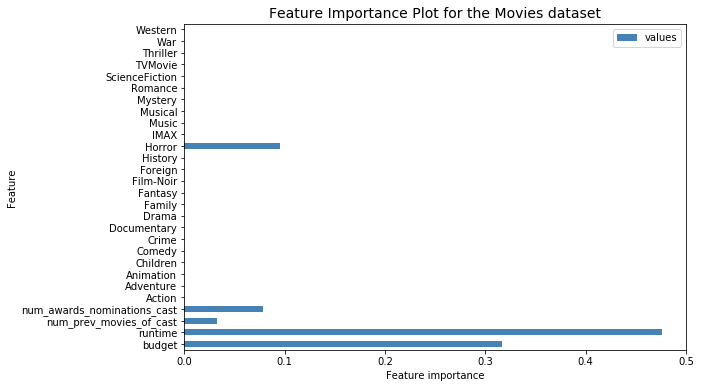

In [301]:
# Display the importance of each feature

feats_df = pd.DataFrame({'labels' : movie_features, 'values' : model.feature_importances_})
display(feats_df)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

feats_df.plot(kind='barh', x='labels', y='values', ax=ax, color='steelblue')

ax.set_title("Feature Importance Plot for the Movies dataset", fontsize=14)
ax.set_xlabel("Feature importance")
ax.set_ylabel("Feature")
plt.show()

#### Random Forest Classifier

In [302]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [303]:
acc_forest = model.score(X_test, y_test)
print(acc_forest)

0.6628849270664505


In [304]:
model = sm.OLS(y.astype(float),X.astype(float))
# Train the model on the training set
#
results = model.fit()
# Print the summary results
#
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             rating_bin   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     2137.
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:57:36   Log-Likelihood:                -2534.7
No. Observations:                3085   AIC:                             5125.
Df Residuals:                    3057   BIC:                             5294.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
budget            

In [305]:
y_pred = np.around(results.fittedvalues).astype(int)

# Find the accuracy score of the result
acc_ols = accuracy_score(y, y_pred)
print(acc_ols)

0.6223662884927067


In [306]:
print('Decision Tree Accuracy: {}'.format(acc_tree))
print('Random Forest Accuracy: {}'.format(acc_forest))
print('OLS Linear Regression Accuracy: {}'.format(acc_ols))

Decision Tree Accuracy: 0.6742301458670988
Random Forest Accuracy: 0.6628849270664505
OLS Linear Regression Accuracy: 0.6223662884927067


### Independent Variables against Revenue

In [307]:
# Define X and y
y = df_merged_trimmed['revenue_bin'].astype('int')
X = df_merged_trimmed.drop(['rating','revenue','revenue_bin','rating_bin'], axis = 1)

In [308]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [309]:
# Create the model
model = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Use the fit() function to train the decision tree model on the training set
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [310]:
# Use the model to predict the outcome on the test set
y_pred = model.predict(X_test)

In [311]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Find the accuracy score of the result
acc_tree = accuracy_score(y_test, y_pred)
print(acc_tree)

[[603   0   0]
 [ 11   2   0]
 [  1   0   0]]
0.9805510534846029


In [312]:
print("Feature importances:\n{}".format(model.feature_importances_))

Feature importances:
[0.76744166 0.         0.16442454 0.01416515 0.         0.
 0.         0.         0.         0.         0.         0.
 0.05396865 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [313]:
movie_features = [x for i,x in enumerate(df_merged_trimmed.drop(['rating','revenue','revenue_bin','rating_bin'], axis = 1).columns)]
# Find the full list of features in the dataset
print(movie_features)

['budget', 'runtime', 'num_prev_movies_of_cast', 'num_awards_nominations_cast', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Foreign', 'History', 'Horror', 'IMAX', 'Music', 'Musical', 'Mystery', 'Romance', 'ScienceFiction', 'TVMovie', 'Thriller', 'War', 'Western']


,labels,values
0,budget,0.77
1,runtime,0.00
2,num_prev_movies_of_cast,0.16
3,num_awards_nominations_cast,0.01
4,Action,0.00
5,Adventure,0.00
6,Animation,0.00
7,Children,0.00
8,Comedy,0.00
9,Crime,0.00


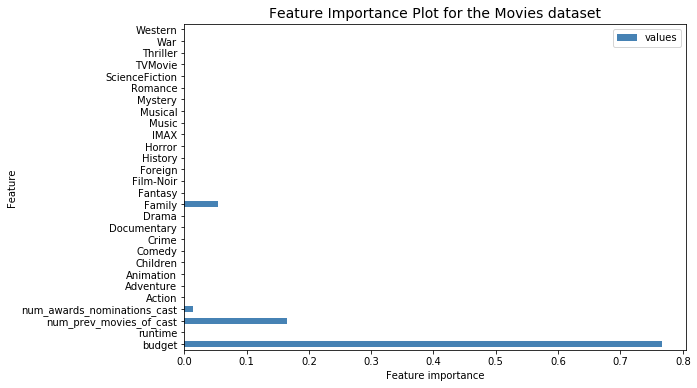

In [314]:
# Display the importance of each feature

feats_df = pd.DataFrame({'labels' : movie_features, 'values' : model.feature_importances_})
display(feats_df)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

feats_df.plot(kind='barh', x='labels', y='values', ax=ax, color='steelblue')

ax.set_title("Feature Importance Plot for the Movies dataset", fontsize=14)
ax.set_xlabel("Feature importance")
ax.set_ylabel("Feature")
plt.show()

#### Decision Tree

In [315]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [316]:
acc_forest = model.score(X_test, y_test)
print(acc_forest)

0.9837925445705025


In [317]:
model = sm.OLS(y.astype(float),X.astype(float))
# Train the model on the training set
results = model.fit()
# Print the summary results
#
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            revenue_bin   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     2679.
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:57:37   Log-Likelihood:                 486.07
No. Observations:                3085   AIC:                            -916.1
Df Residuals:                    3057   BIC:                            -747.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
budget            

In [318]:
y_pred = np.around(results.fittedvalues).astype(int)
# Find the accuracy score of the result
acc_ols = accuracy_score(y, y_pred)
print(acc_ols)

0.9753646677471637


In [319]:
print('Decision Tree Accuracy: {}'.format(acc_tree))
print('Random Forest Accuracy: {}'.format(acc_forest))
print('OLS Linear Regression Accuracy: {}'.format(acc_ols))

Decision Tree Accuracy: 0.9805510534846029
Random Forest Accuracy: 0.9837925445705025
OLS Linear Regression Accuracy: 0.9753646677471637


### Explanation of results

As seen, the ability to predict the ratings bin is extremely high at around 97%. This may be due to the fact that the budget heavily correlates to the revenue of a movie, as shown by the feature importance in the Decision Tree.

Random forest performed the best again, acheiving 98% accuracy. This might be because random forest algorithm averages multiple decision trees and reduces overfitting.

## MultiOutput Models

Now that we created models for individual dependent variables, we shall try to create models to predict both revenue and ratings.

However, OLS Linear Regression would not be able to produce any output for this multioutput model. Hence, we are only comparing Decision Tree and Random Forest.

In [320]:
# Define X and y
y = df_merged_trimmed[['rating_bin','revenue_bin']].astype(int)
X = df_merged_trimmed.drop(['rating','revenue','revenue_bin','rating_bin'], axis = 1)

In [321]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [322]:
# Create the model
from sklearn.multioutput import MultiOutputClassifier

model = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

model = MultiOutputClassifier(model, n_jobs=-1)
# Use the fit() function to train the decision tree model on the training set
model.fit(X_train,y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
           n_jobs=-1)

In [323]:
acc_tree = model.score(X_test, y_test)
print(acc_tree)

0.6661264181523501


model = RandomForestClassifier()
model = MultiOutputClassifier(model, n_jobs=-1)

model.fit(X_train,y_train)

In [324]:
acc_forest = model.score(X_test, y_test)
print(acc_forest)

0.6661264181523501


In [325]:
print('Decision Tree Accuracy: {}'.format(acc_tree))
print('Random Forest Accuracy: {}'.format(acc_forest))

Decision Tree Accuracy: 0.6661264181523501
Random Forest Accuracy: 0.6661264181523501


### Explanation of results

As expected, the accuracy is around 65%, which is similar to the accuracy for the models for ratings. This is because the multi-output model would only be able to predict correctly the rating_bin of a movie around 65% of the time. Hence, the ratings_bin would be the 'limiting factor' in this case.

Moreover, random forest performed better. Similarly, it may be because random forest algorithm averages multiple decision trees and reduces overfitting.

# Conclusion

Through this, we explored various movie datasets and cleaned and compiled them before performing EDA and running some models on them. 

### EDA 
The EDA we have done gives us a better sense of the correlation between the factors that we have picked out as our independent variables and our dependent variables. Independent factors such as **Budget**, **Number of Cast Awards** and **Runtime** seem to share a very positive correlation to both **Revenue** and **Ratings**. As such, we would expect our Machine Learning Model to give us a result that is congruent with such an observation.

Moreover, the EDA helped us eliminate factors which were more insignificant in accurately correlating the movie's **Revenue** and **Review**.

### Model Results

The biggest indicator of **Revenue** seems to be **Budget** while the biggest indicators of **Ratings** seem to be **Budget** and **Runtime**. There does not seem to be much correlation between the other factors, such as number of awards the cast won or number of movies the cast appeared in or the genres of the movie, and the movie's success.